<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Machine-Learning_Project/blob/main/ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
ride_data = pd.read_csv("/content/cab_rides.csv")
ride_data.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


In [ ]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [ ]:
weather_data = pd.read_csv("/content/weather.csv")
weather_data.tail()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54
6275,44.69,West End,0.89,1000.70,NaN,1543819974,0.96,1.52


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [ ]:
ride_data['time_stamp'] = pd.to_datetime(ride_data['time_stamp']/1000, unit='s')
ride_data['time_stamp']

0        2018-12-16 09:30:07.890000128
1        2018-11-27 02:00:23.676999936
2        2018-11-28 01:00:22.197999872
3        2018-11-30 04:53:02.749000192
4        2018-11-29 03:49:20.223000064
                      ...             
693066   2018-12-01 23:53:05.533999872
693067   2018-12-01 23:53:05.533999872
693068   2018-12-01 23:53:05.533999872
693069   2018-12-01 23:53:05.533999872
693070   2018-12-01 23:53:05.533999872
Name: time_stamp, Length: 693071, dtype: datetime64[ns]

In [ ]:
ride_data['date'] = ride_data['time_stamp'].dt.date
ride_data['time'] = ride_data['time_stamp'].dt.hour
ride_data['week_day'] = ride_data['time_stamp'].dt.weekday
ride_data.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,time,week_day
693066,1.0,Uber,2018-12-01 23:53:05.533999872,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01,23,5
693067,1.0,Uber,2018-12-01 23:53:05.533999872,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01,23,5
693068,1.0,Uber,2018-12-01 23:53:05.533999872,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01,23,5
693069,1.0,Uber,2018-12-01 23:53:05.533999872,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01,23,5
693070,1.0,Uber,2018-12-01 23:53:05.533999872,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-01,23,5


In [ ]:
weather_data['time_stamp'] = pd.to_datetime(weather_data['time_stamp'], unit='s')
weather_data['time_stamp']

0      2018-12-16 23:45:01
1      2018-12-16 23:45:01
2      2018-12-16 23:45:01
3      2018-12-16 23:45:01
4      2018-12-16 23:45:01
               ...        
6271   2018-12-03 06:52:54
6272   2018-12-03 06:52:54
6273   2018-12-03 06:52:54
6274   2018-12-03 06:52:54
6275   2018-12-03 06:52:54
Name: time_stamp, Length: 6276, dtype: datetime64[ns]

In [ ]:
weather_data['date'] = weather_data['time_stamp'].dt.date
weather_data['time'] = weather_data['time_stamp'].dt.hour
weather_data.tail()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date,time
6271,44.72,North Station,0.89,1000.69,NaN,2018-12-03 06:52:54,0.96,1.52,2018-12-03,6
6272,44.85,Northeastern University,0.88,1000.71,NaN,2018-12-03 06:52:54,0.96,1.54,2018-12-03,6
6273,44.82,South Station,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54,2018-12-03,6
6274,44.78,Theatre District,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54,2018-12-03,6
6275,44.69,West End,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.52,2018-12-03,6


In [ ]:
ride_data.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
date                    0
time                    0
week_day                0
dtype: int64

In [ ]:
ride_clean = ride_data.dropna()
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  datetime64[ns]
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  date              637976 non-null  object        
 11  time              637976 non-null  int64         
 12  week_day          637976 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memor

In [ ]:
unique_class, counts = np.unique(ride_clean["name"], return_counts=True)
print(unique_class)

['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


Text(0.5, 1.0, 'Bar Plot: Different services')

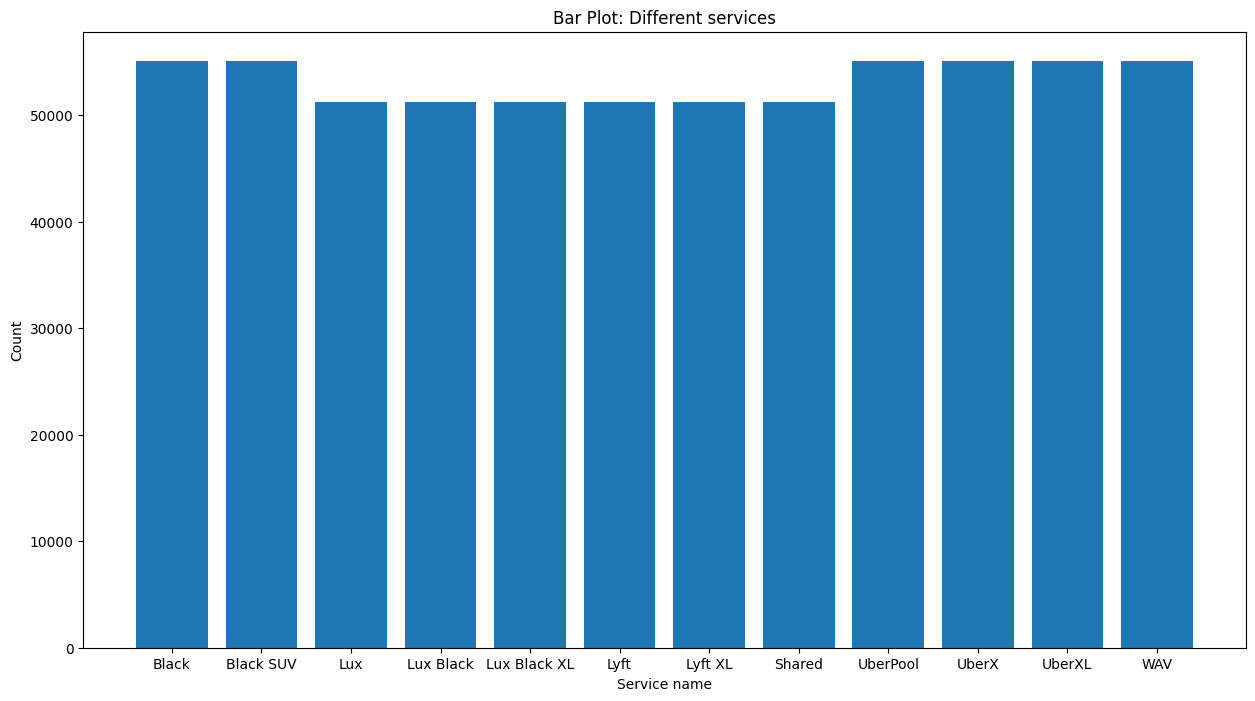

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts)

plt.xlabel('Service name')
plt.ylabel('Count')
plt.title('Bar Plot: Different services')

In [ ]:
rides = ride_clean[(ride_clean['name']=='Lyft')|(ride_clean['name']=='UberX')]
unique_class, counts = np.unique(rides["name"], return_counts=True)
unique_class

array(['Lyft', 'UberX'], dtype=object)

Text(0.5, 1.0, 'Bar Plot: Different services')

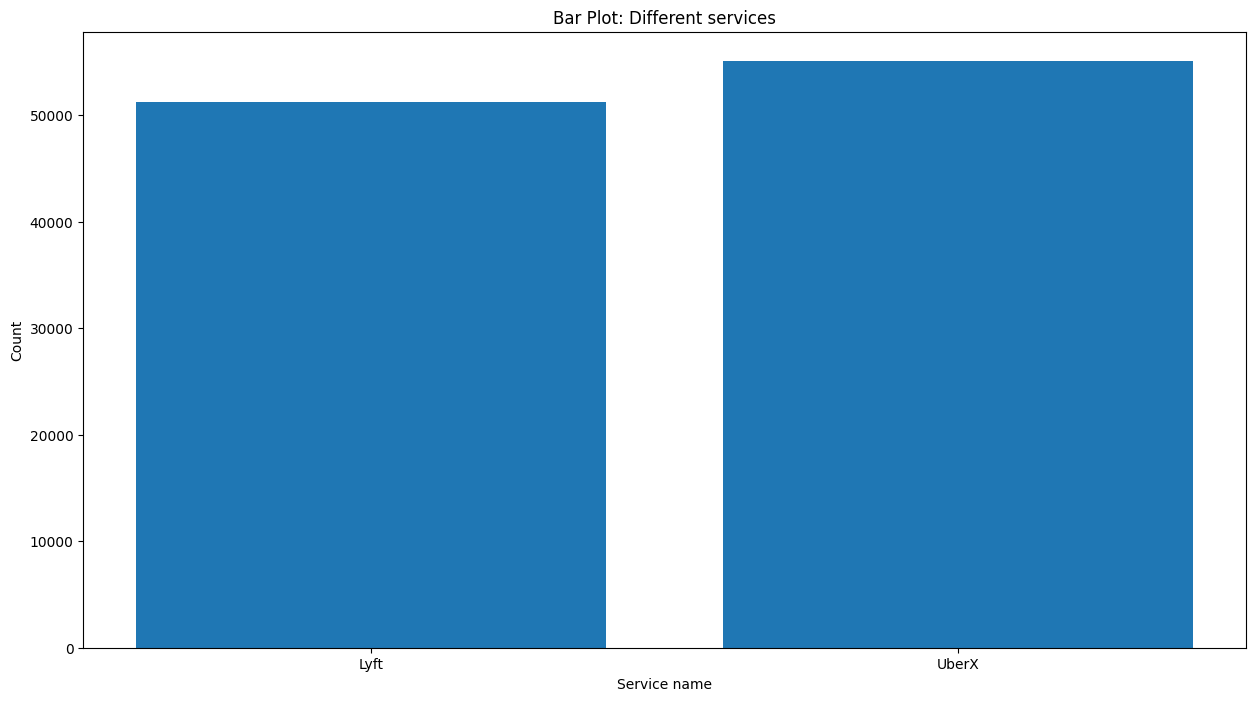

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts)

plt.xlabel('Service name')
plt.ylabel('Count')
plt.title('Bar Plot: Different services')

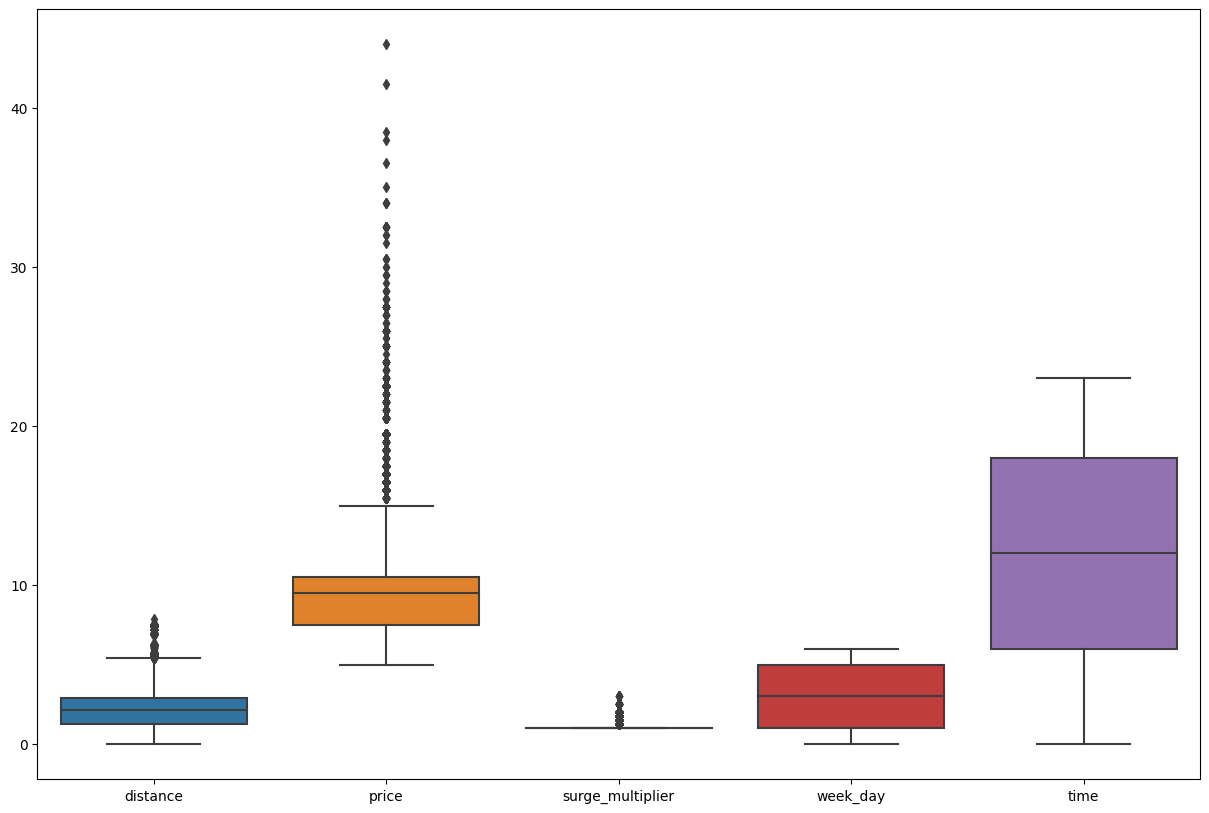

In [ ]:
columns = ["distance", "price", "surge_multiplier", "week_day", "time"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=rides[columns])
plt.show()

In [ ]:
grouped_rides = rides.groupby('name')
uber = grouped_rides.get_group('UberX')
lyft = grouped_rides.get_group('Lyft')

Text(0.5, 1.0, 'Scatter Plot')

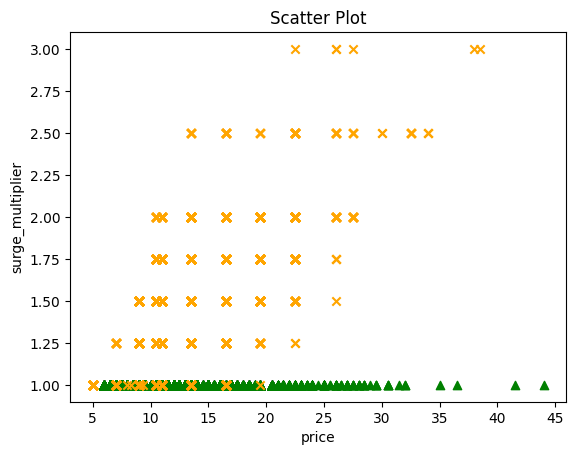

In [ ]:
plt.scatter(uber['price'],uber['surge_multiplier'],c="green",marker ="^")
plt.scatter(lyft['price'],lyft['surge_multiplier'],c="orange",marker ="x")
plt.xlabel('price')
plt.ylabel('surge_multiplier')
plt.title('Scatter Plot')

In [ ]:
unique_class, counts = np.unique(rides["destination"], return_counts=True)
unique_class

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Back Bay'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Boston University'),
  Text(3, 0, 'Fenway'),
  Text(4, 0, 'Financial District'),
  Text(5, 0, 'Haymarket Square'),
  Text(6, 0, 'North End'),
  Text(7, 0, 'North Station'),
  Text(8, 0, 'Northeastern University'),
  Text(9, 0, 'South Station'),
  Text(10, 0, 'Theatre District'),
  Text(11, 0, 'West End')])

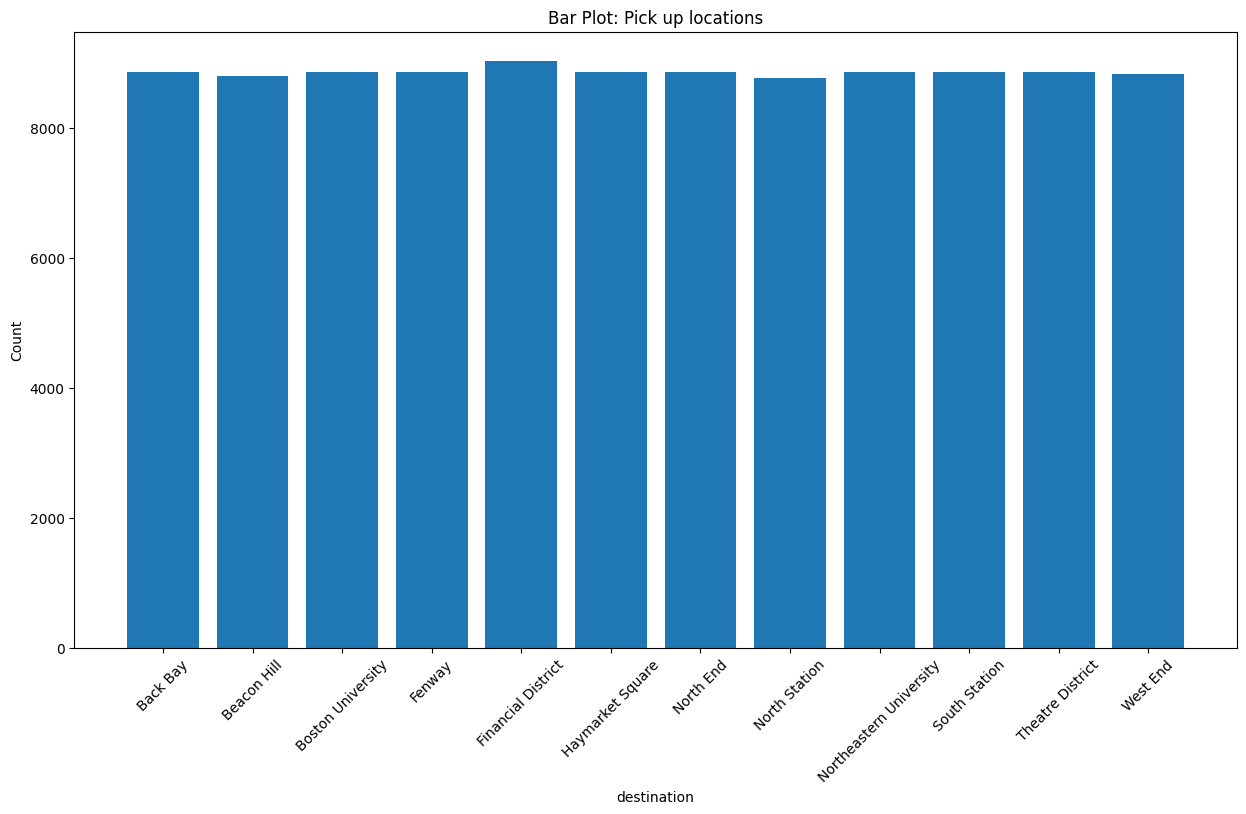

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts)

plt.xlabel('destination')
plt.ylabel('Count')
plt.title('Bar Plot: Pick up locations')
plt.xticks(rotation=45)

In [ ]:
unique_class, counts = np.unique(rides["source"], return_counts=True)
unique_class

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Back Bay'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Boston University'),
  Text(3, 0, 'Fenway'),
  Text(4, 0, 'Financial District'),
  Text(5, 0, 'Haymarket Square'),
  Text(6, 0, 'North End'),
  Text(7, 0, 'North Station'),
  Text(8, 0, 'Northeastern University'),
  Text(9, 0, 'South Station'),
  Text(10, 0, 'Theatre District'),
  Text(11, 0, 'West End')])

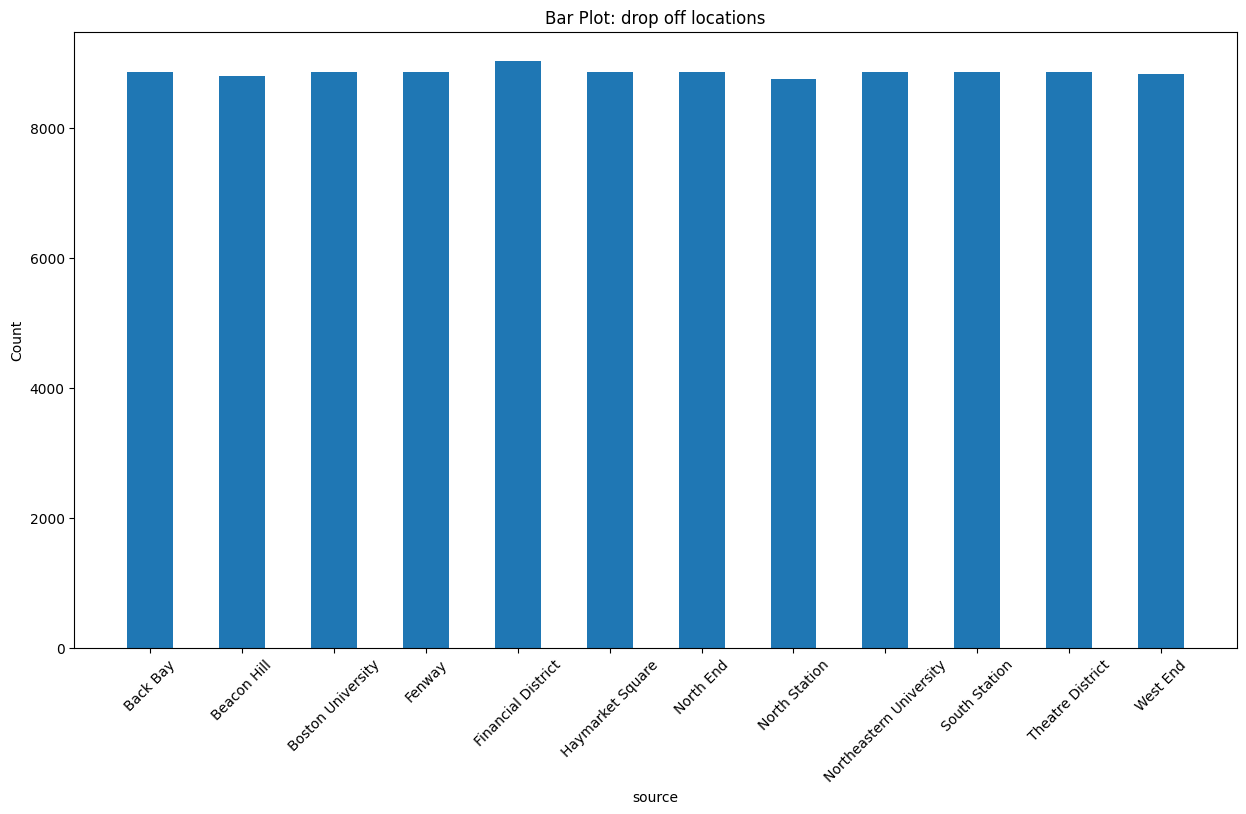

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts, width=0.5)
#lt.rc('font', size=10)
plt.xlabel('source', fontsize=10)
plt.ylabel('Count')
plt.title('Bar Plot: drop off locations')
plt.xticks(rotation=45)

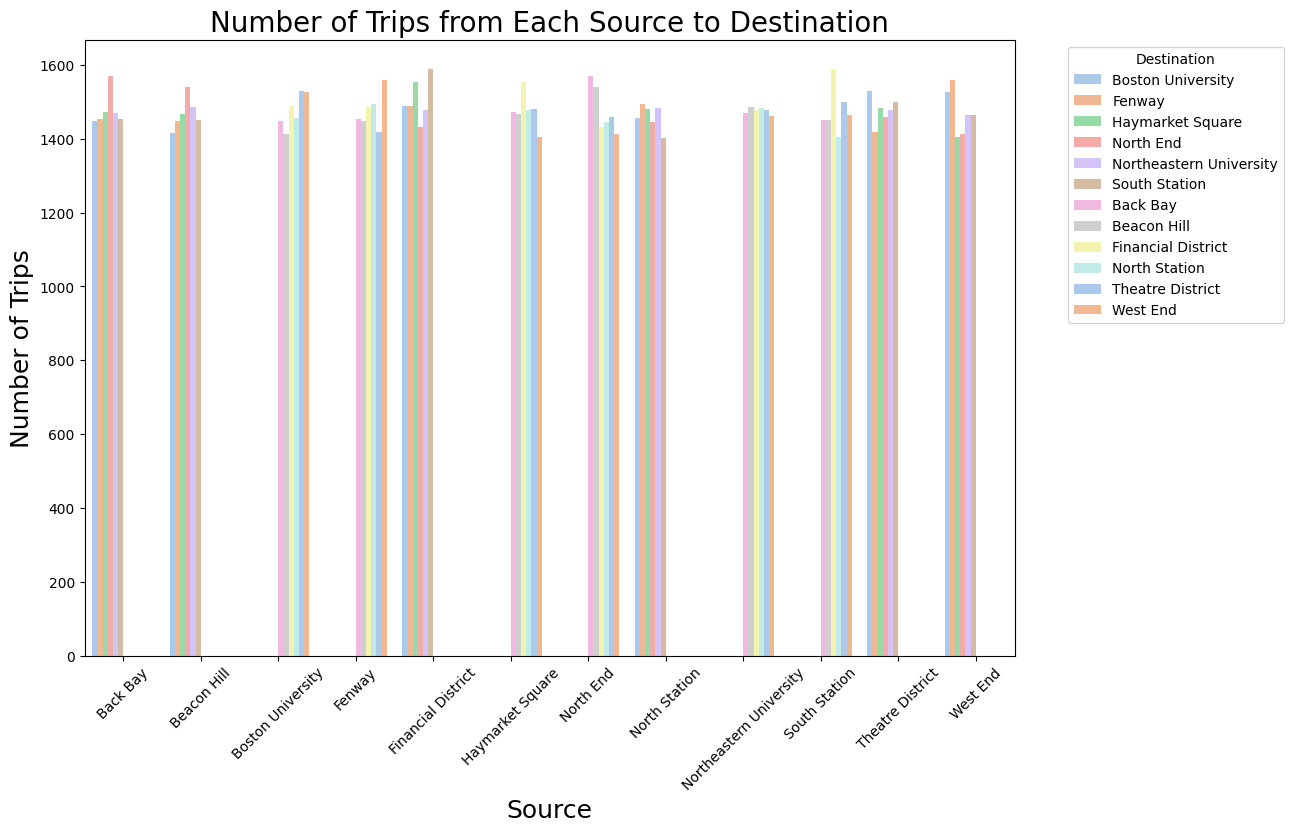

In [ ]:
source_destination_counts = rides.groupby(['source', 'destination']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(source_destination_counts['destination'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='source', y='count', hue='destination', data=source_destination_counts, palette=custom_palette, width=0.8)

plt.xlabel('Source', fontsize=18)
plt.ylabel('Number of Trips', fontsize=18)
plt.title('Number of Trips from Each Source to Destination', fontsize=20)
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

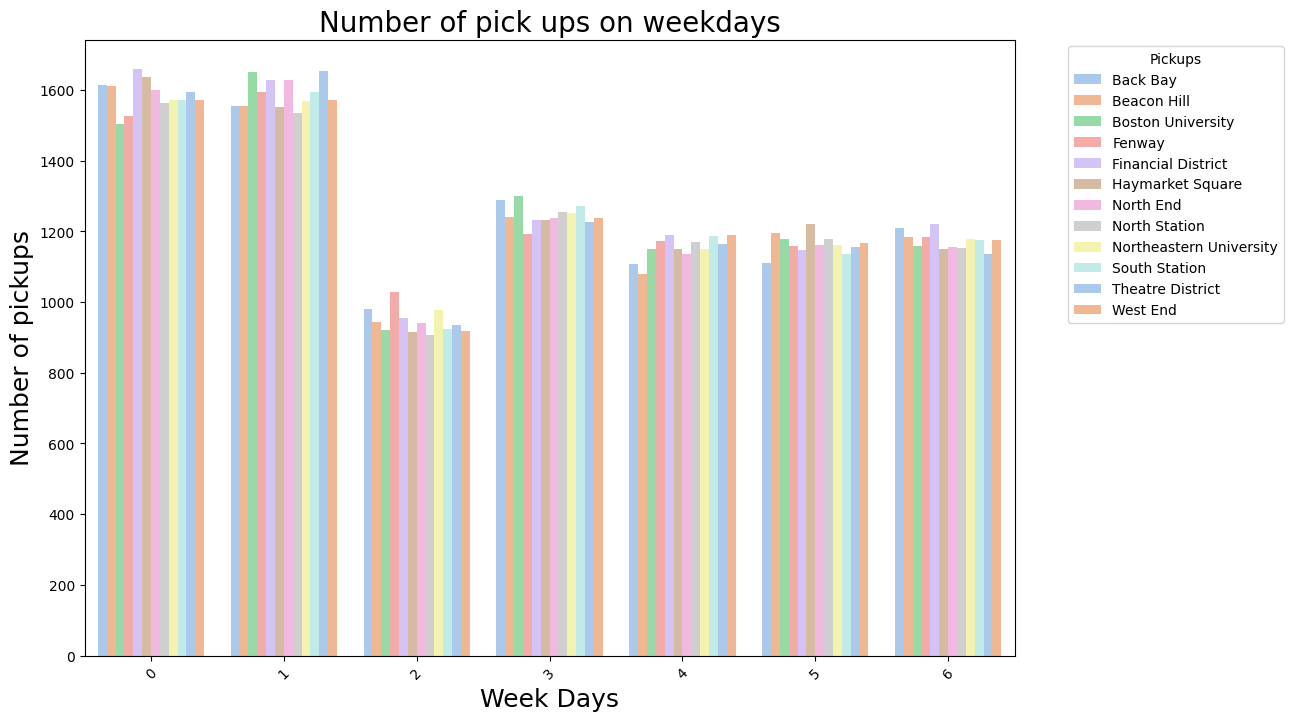

In [ ]:
pickup_on_weekdays = rides.groupby(['week_day', 'source']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(pickup_on_weekdays['source'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='week_day', y='count', hue='source', data=pickup_on_weekdays, palette=custom_palette, width=0.8)

plt.xlabel('Week Days', fontsize=18)
plt.ylabel('Number of pickups', fontsize=18)
plt.title('Number of pick ups on weekdays', fontsize=20)
plt.xticks(rotation=45)
plt.legend(title='Pickups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

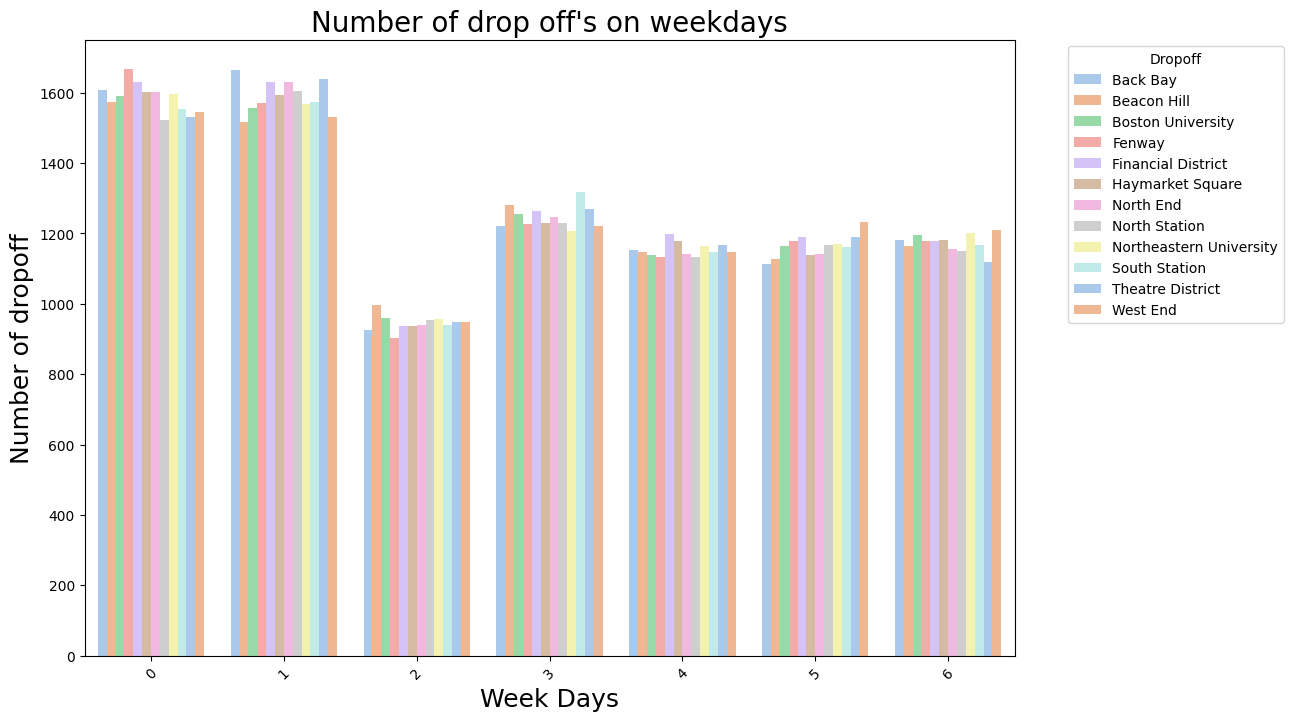

In [ ]:
dropoff_on_weekdays = rides.groupby(['week_day', 'destination']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(dropoff_on_weekdays['destination'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='week_day', y='count', hue='destination', data=dropoff_on_weekdays, palette=custom_palette, width=0.8)

plt.xlabel('Week Days', fontsize=18)
plt.ylabel('Number of dropoff', fontsize=18)
plt.title("Number of drop off's on weekdays", fontsize=20)
plt.xticks(rotation=45)
plt.legend(title='Dropoff', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
source_dest_weekday_counts = rides.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

,source,destination,week_day,count
0,Back Bay,Boston University,0,285
1,Back Bay,Boston University,1,227
2,Back Bay,Boston University,2,171
3,Back Bay,Boston University,3,222
4,Back Bay,Boston University,4,185
...,...,...,...,...
499,West End,South Station,2,141
500,West End,South Station,3,214
501,West End,South Station,4,201
502,West End,South Station,5,204


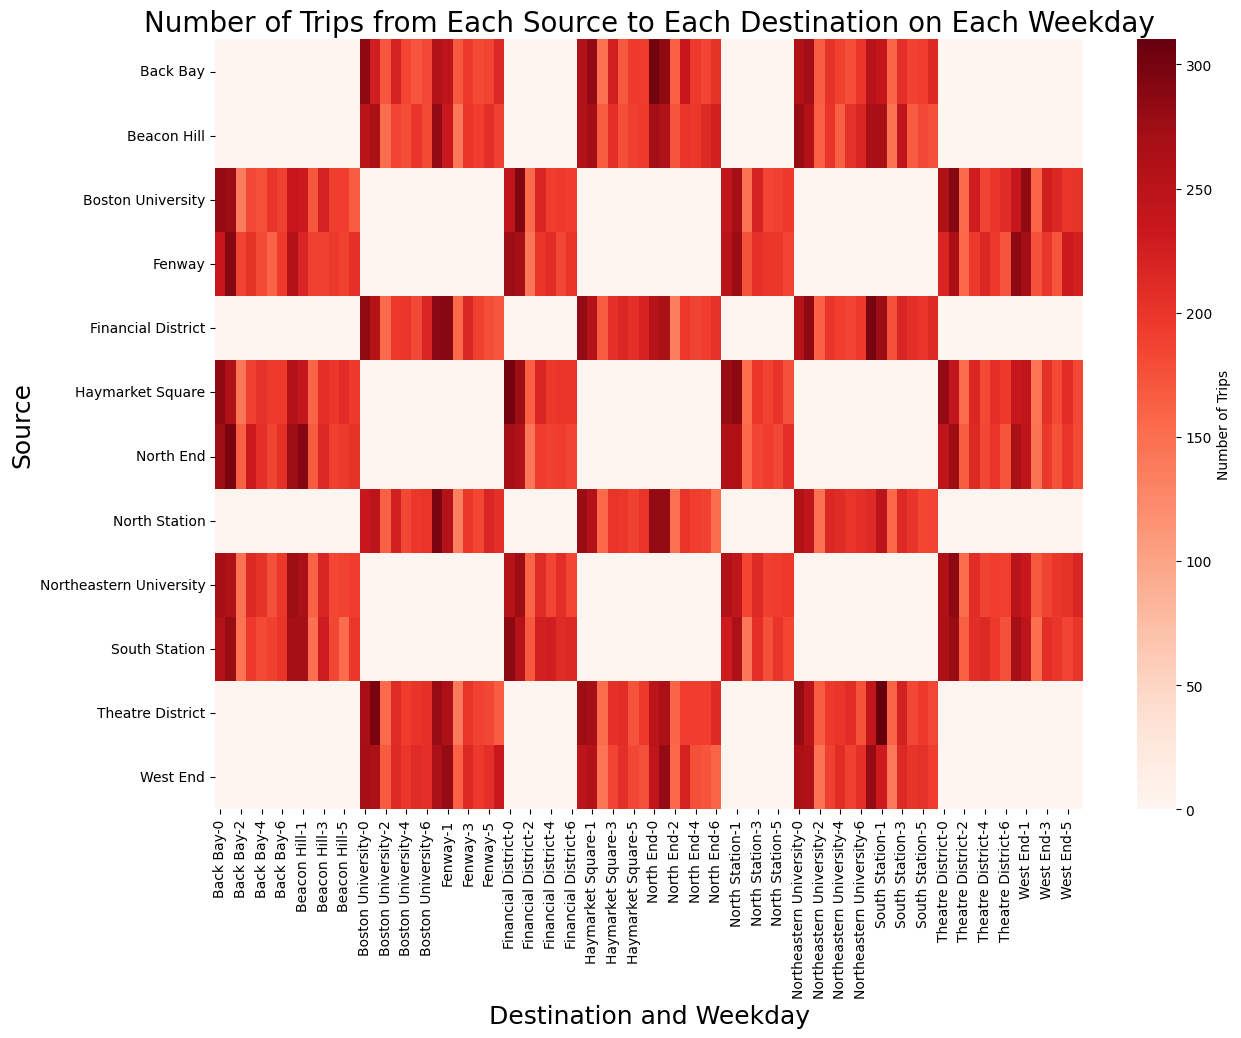

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Trips from Each Source to Each Destination on Each Weekday', fontsize=20)

plt.show()

In [ ]:
source_dest_weekday_counts = uber.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

,source,destination,week_day,count
0,Back Bay,Boston University,0,143
1,Back Bay,Boston University,1,112
2,Back Bay,Boston University,2,83
3,Back Bay,Boston University,3,126
4,Back Bay,Boston University,4,88
...,...,...,...,...
499,West End,South Station,2,70
500,West End,South Station,3,106
501,West End,South Station,4,99
502,West End,South Station,5,105


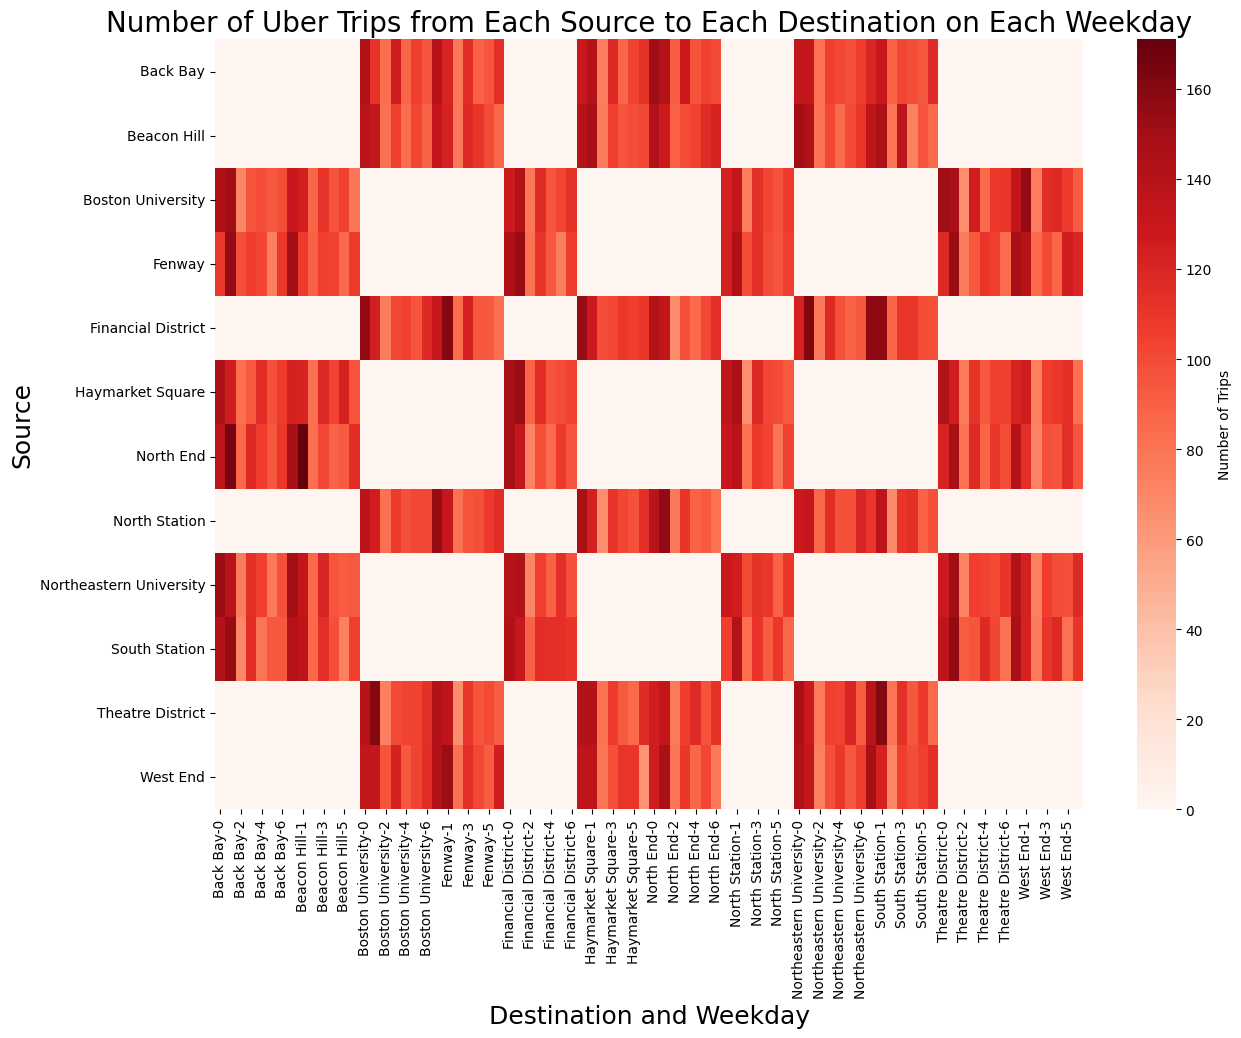

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Uber Trips from Each Source to Each Destination on Each Weekday', fontsize=20)

plt.show()

In [ ]:
source_dest_weekday_counts = lyft.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

,source,destination,week_day,count
0,Back Bay,Boston University,0,142
1,Back Bay,Boston University,1,115
2,Back Bay,Boston University,2,88
3,Back Bay,Boston University,3,96
4,Back Bay,Boston University,4,97
...,...,...,...,...
499,West End,South Station,2,71
500,West End,South Station,3,108
501,West End,South Station,4,102
502,West End,South Station,5,99


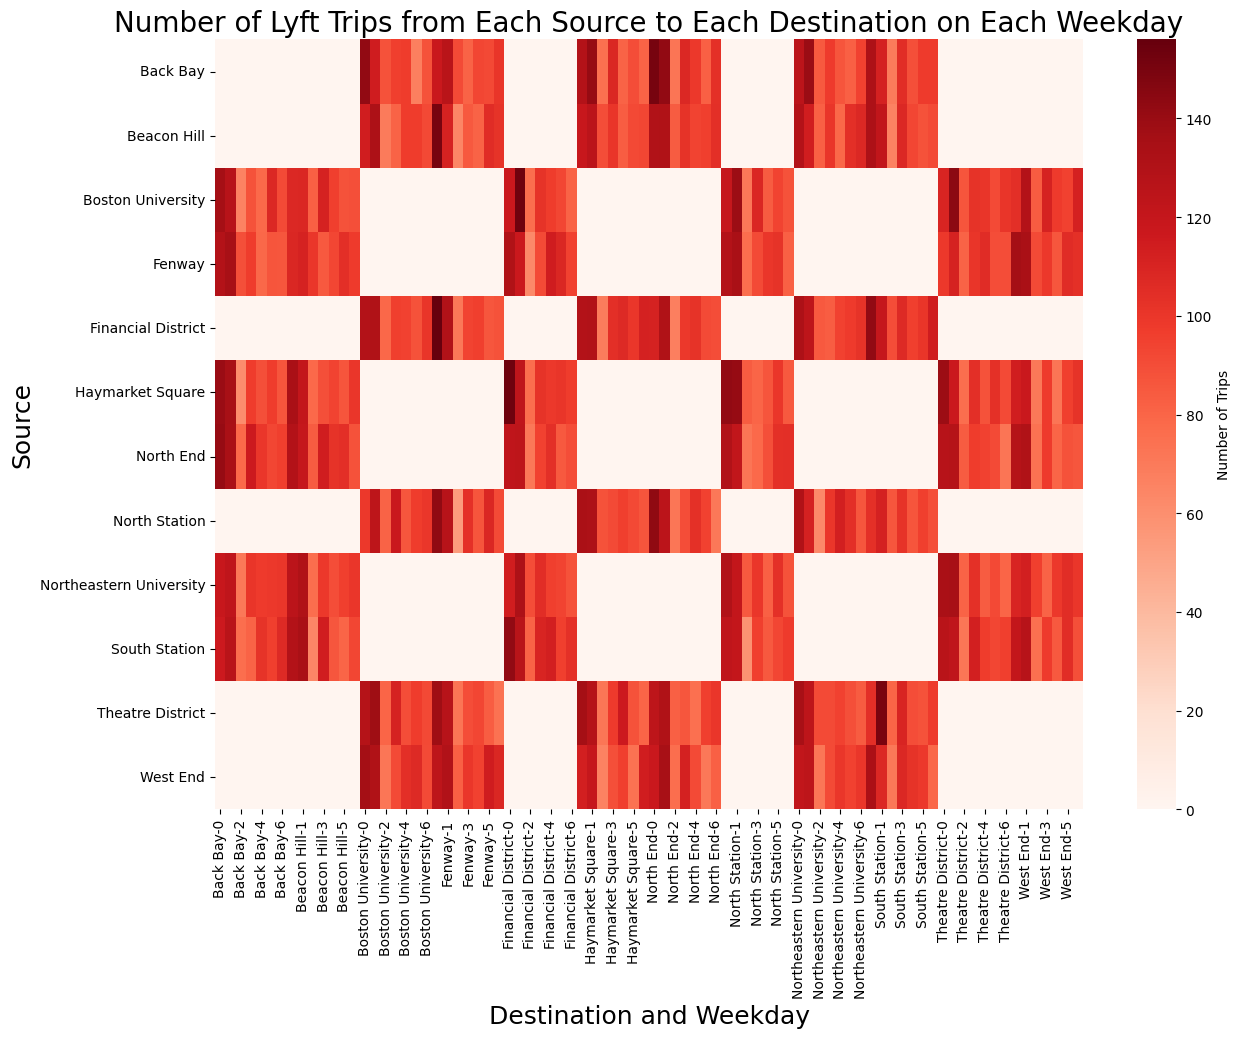

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Lyft Trips from Each Source to Each Destination on Each Weekday', fontsize=20)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be place

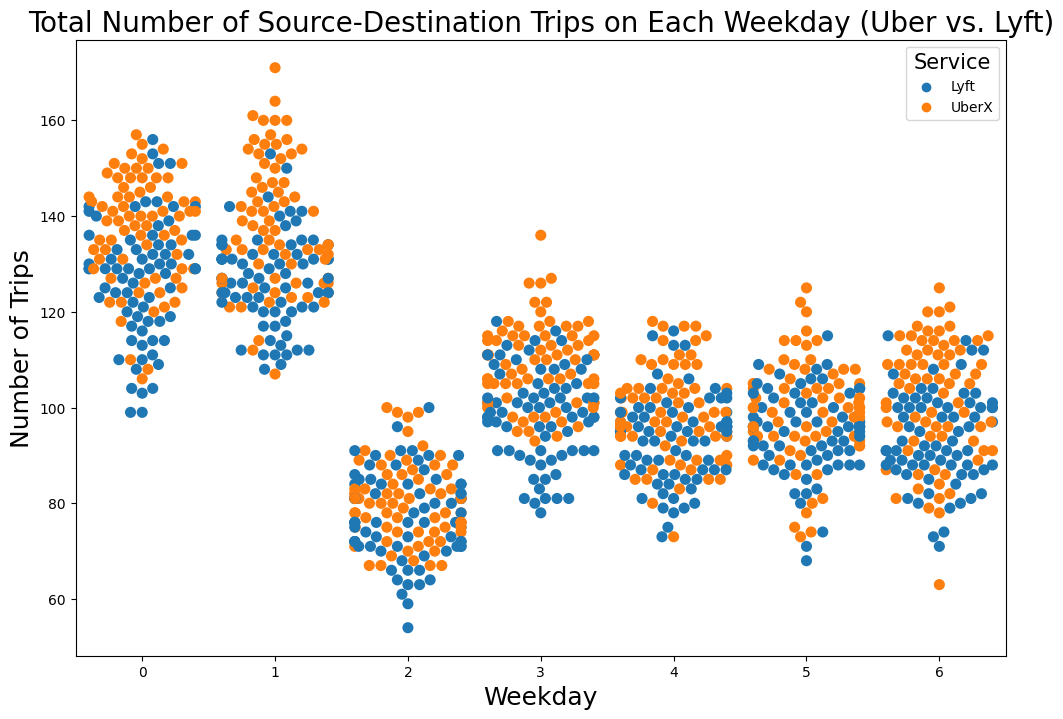

In [ ]:
source_dest_service_weekday_counts = rides.groupby(['source', 'destination', 'name', 'week_day']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))

sns.swarmplot(x='week_day', y='count', hue='name', data=source_dest_service_weekday_counts, size=8)

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Number of Trips', fontsize=18)
plt.title('Total Number of Source-Destination Trips on Each Weekday (Uber vs. Lyft)', fontsize=20)

plt.legend(title='Service', title_fontsize='15')

plt.show()

In [ ]:
source_counts = rides.groupby(['name', 'week_day', 'source']).size().reset_index(name='count')
destination_counts = rides.groupby(['name', 'week_day', 'destination']).size().reset_index(name='count')

print(source_counts.head)
print(destination_counts.head)

<bound method NDFrame.head of       name  week_day                   source  count
0     Lyft         0                 Back Bay    797
1     Lyft         0              Beacon Hill    775
2     Lyft         0        Boston University    695
3     Lyft         0                   Fenway    733
4     Lyft         0       Financial District    799
..     ...       ...                      ...    ...
163  UberX         6            North Station    629
164  UberX         6  Northeastern University    624
165  UberX         6            South Station    589
166  UberX         6         Theatre District    609
167  UberX         6                 West End    601

[168 rows x 4 columns]>
<bound method NDFrame.head of       name  week_day              destination  count
0     Lyft         0                 Back Bay    781
1     Lyft         0              Beacon Hill    734
2     Lyft         0        Boston University    748
3     Lyft         0                   Fenway    830
4     Lyft    

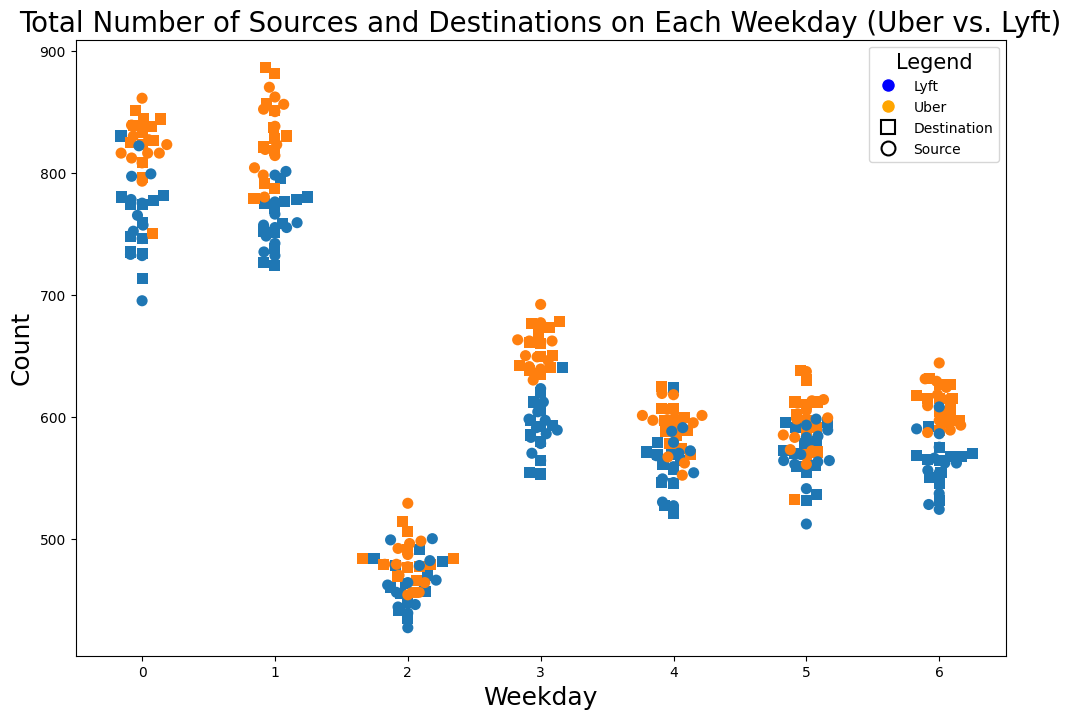

In [ ]:
plt.figure(figsize=(12, 8))

# Create a dot plot using seaborn's swarmplot for destination
sns.swarmplot(x='week_day', y='count', hue='name', data=destination_counts, size=8, marker='s', label='Destination')

# Create a dot plot using seaborn's swarmplot for source
sns.swarmplot(x='week_day', y='count', hue='name', data=source_counts, size=8, marker='o', label='Source')

# Set labels and title
plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Total Number of Sources and Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)

# Show the legend
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Lyft'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Uber'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=10, label='Destination', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Source', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=custom_legend, title='Legend', title_fontsize='15')

# Show the plot
plt.show()

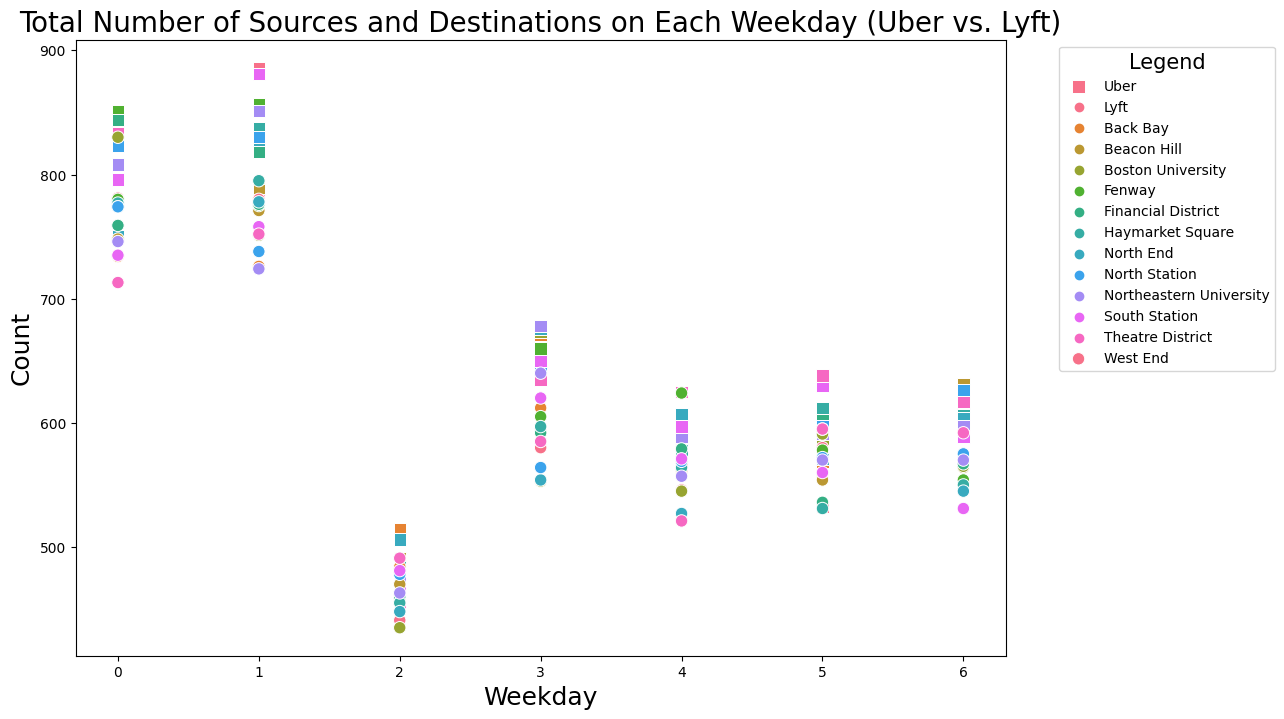

In [ ]:
plt.figure(figsize=(12, 8))

custom_palette = sns.color_palette("dark", n_colors=len(destination_counts['destination'].unique()))

sns.scatterplot(x='week_day', y='count', hue='destination', data=destination_counts[destination_counts['name'] == 'UberX'], s=80, marker='s', label='Uber')

sns.scatterplot(x='week_day', y='count', hue='destination', data=destination_counts[destination_counts['name'] == 'Lyft'], s=80, marker='o', label='Lyft')

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Total Number of Sources and Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)


legend_labels = ["Uber", "Lyft"] + list(destination_counts['destination'].unique())
plt.legend(title='Legend', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

plt.show()

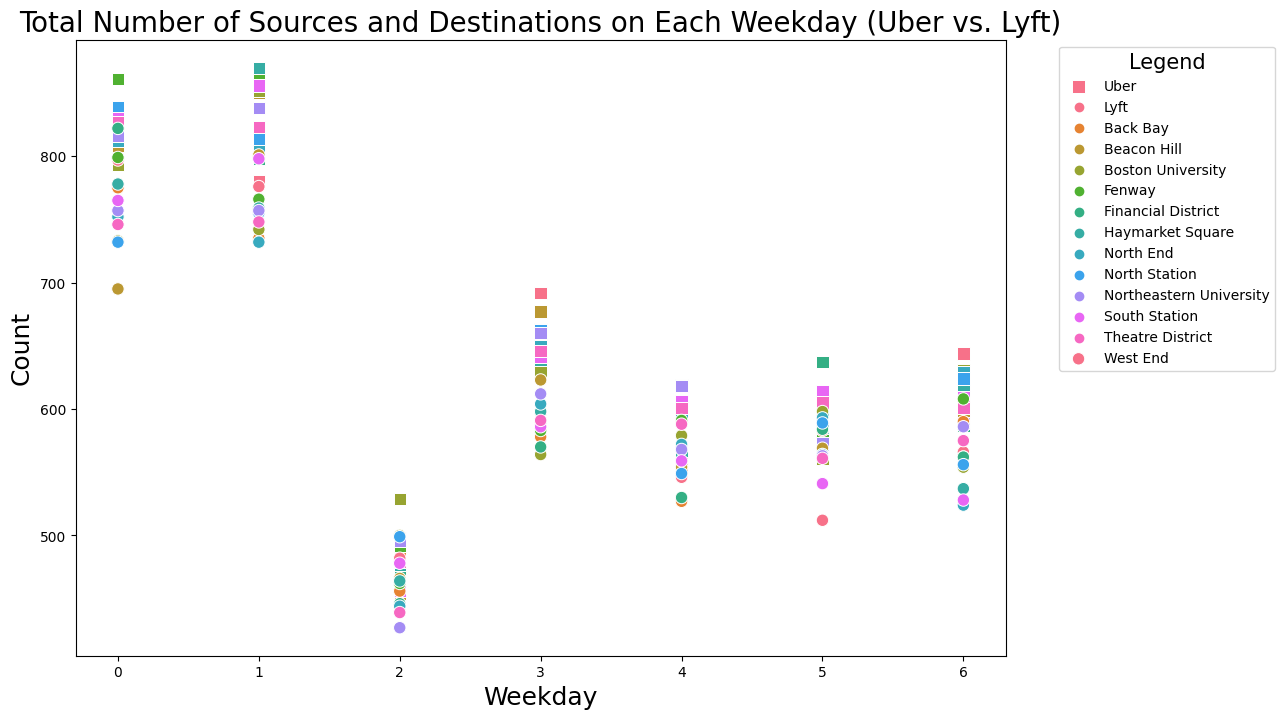

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='week_day', y='count', hue='source', data=source_counts[source_counts['name'] == 'UberX'], s=80, marker='s', label='Uber')

sns.scatterplot(x='week_day', y='count', hue='source', data=source_counts[source_counts['name'] == 'Lyft'], s=80, marker='o', label='Lyft')

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Total Number of Sources and Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)


legend_labels = ["Uber", "Lyft"] + list(source_counts['source'].unique())
plt.legend(title='Legend', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

plt.show()

In [ ]:
def no_of_rides_weekdays(source_uber, source_lyft, name):
  rides_per_weekday_uber = source_uber['week_day'].value_counts().sort_index()
  rides_per_weekday_lyft = source_lyft['week_day'].value_counts().sort_index()

  plt.figure(figsize=(10, 6))

  sns.lineplot(x=rides_per_weekday_uber.index, y=rides_per_weekday_uber.values, marker='o', label='Uber')

  sns.lineplot(x=rides_per_weekday_lyft.index, y=rides_per_weekday_lyft.values, marker='o', label='Lyft')

  plt.xlabel('Weekday', fontsize=14)
  plt.ylabel('Number of Rides', fontsize=14)
  plt.title('Number of Rides over the Weekdays for '+name+' (Uber vs. Lyft)', fontsize=16)

  plt.legend()

  plt.show()

<ipython-input-185-7bdffa92f8a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Back Bay']
<ipython-input-185-7bdffa92f8a1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Back Bay']


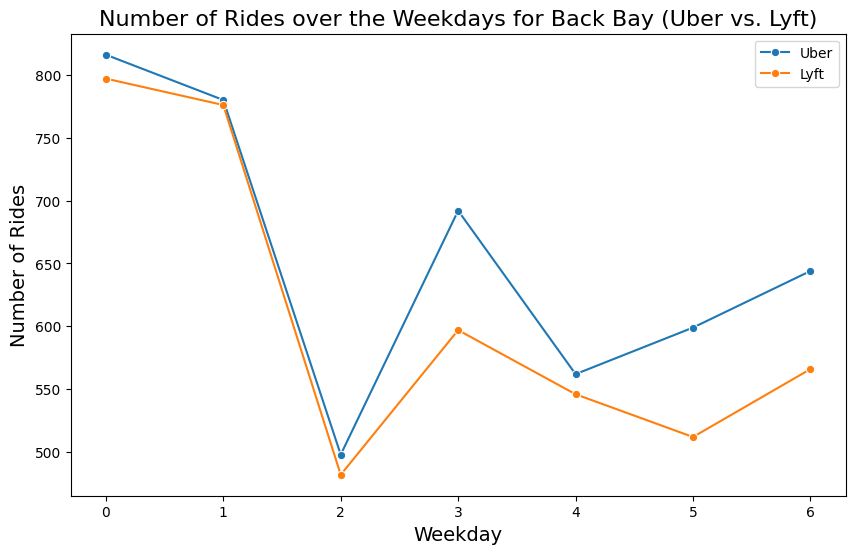

In [ ]:

source_uber = uber[rides['source'] == 'Back Bay']
source_lyft = lyft[rides['source'] == 'Back Bay']

no_of_rides_weekdays(source_uber, source_lyft, 'Back Bay')

<ipython-input-186-1d10de64baa3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Beacon Hill']
<ipython-input-186-1d10de64baa3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Beacon Hill']


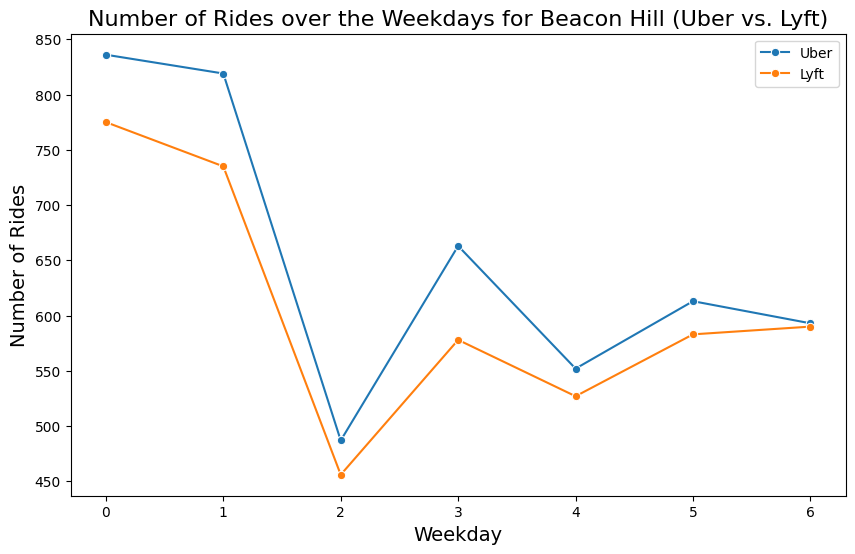

In [ ]:
source_uber = uber[rides['source'] == 'Beacon Hill']
source_lyft = lyft[rides['source'] == 'Beacon Hill']

no_of_rides_weekdays(source_uber, source_lyft, 'Beacon Hill')

<ipython-input-187-9024a0ccf601>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Boston University']
<ipython-input-187-9024a0ccf601>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Boston University']


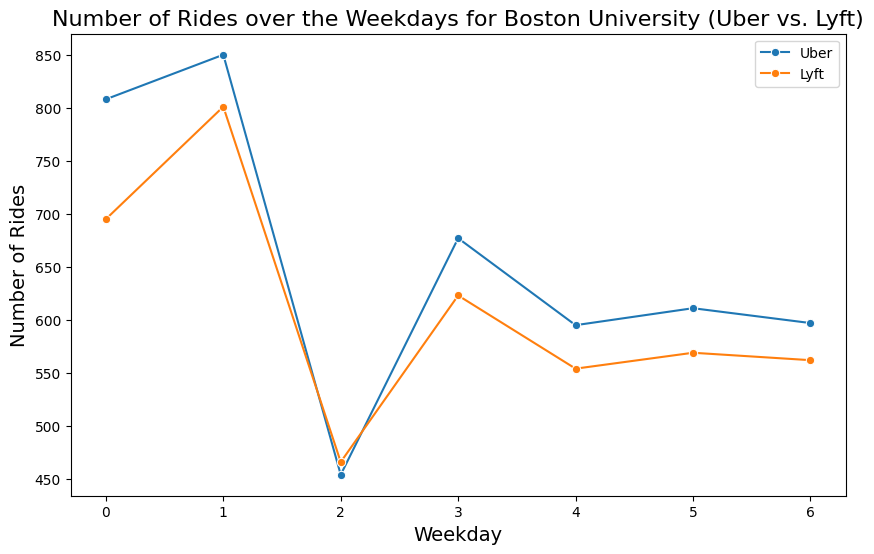

In [ ]:
source_uber = uber[rides['source'] == 'Boston University']
source_lyft = lyft[rides['source'] == 'Boston University']

no_of_rides_weekdays(source_uber, source_lyft, 'Boston University')

<ipython-input-188-1d9b63d74f59>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Fenway']
<ipython-input-188-1d9b63d74f59>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Fenway']


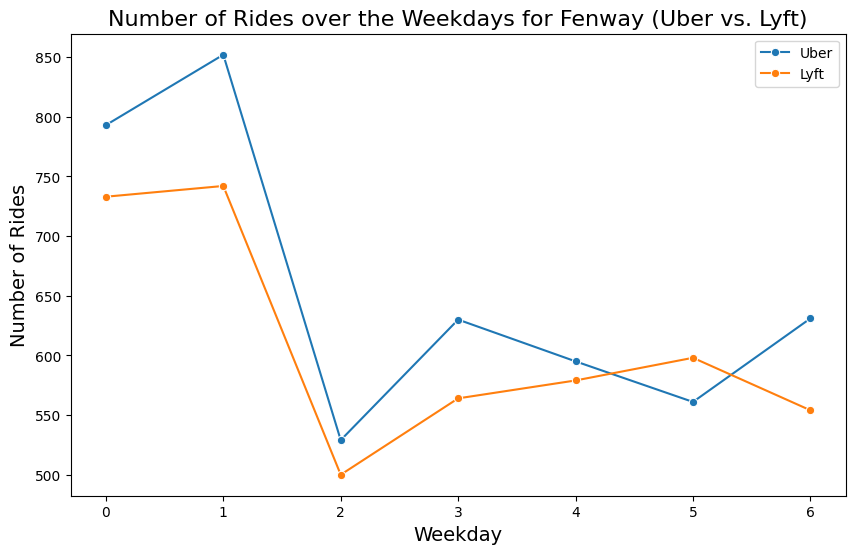

In [ ]:
source_uber = uber[rides['source'] == 'Fenway']
source_lyft = lyft[rides['source'] == 'Fenway']

no_of_rides_weekdays(source_uber, source_lyft, 'Fenway')

<ipython-input-189-a8d75b9aef0d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Financial District']
<ipython-input-189-a8d75b9aef0d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Financial District']


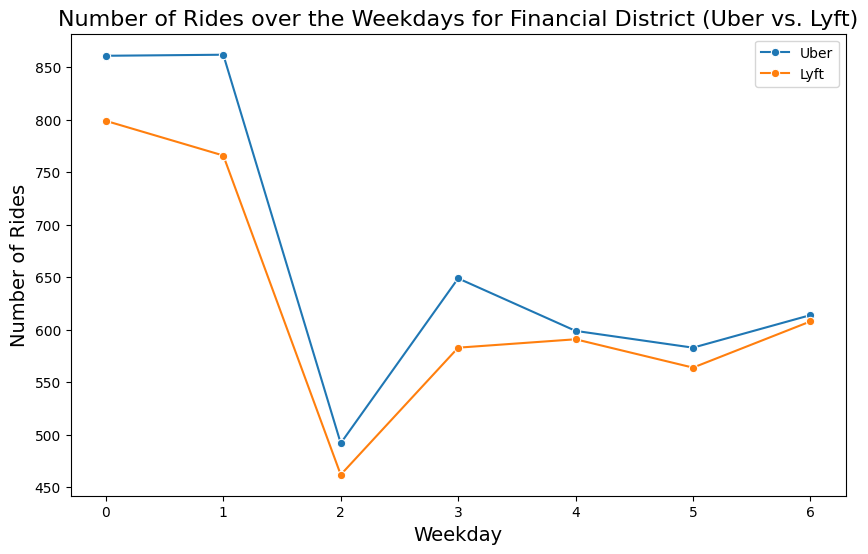

In [ ]:
source_uber = uber[rides['source'] == 'Financial District']
source_lyft = lyft[rides['source'] == 'Financial District']

no_of_rides_weekdays(source_uber, source_lyft, 'Financial District')

<ipython-input-190-5d5de2138c06>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Haymarket Square']
<ipython-input-190-5d5de2138c06>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Haymarket Square']


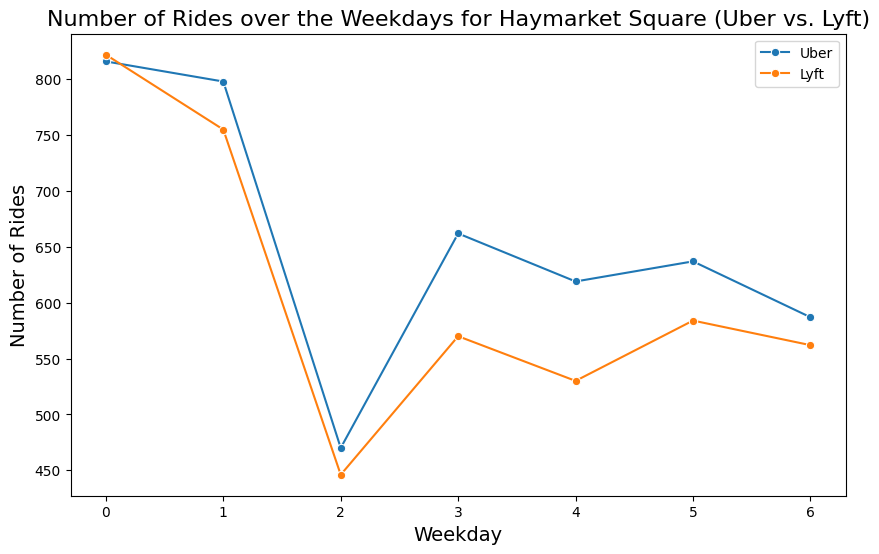

In [ ]:
source_uber = uber[rides['source'] == 'Haymarket Square']
source_lyft = lyft[rides['source'] == 'Haymarket Square']

no_of_rides_weekdays(source_uber, source_lyft, 'Haymarket Square')

<ipython-input-191-fc5f4bf95076>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'North End']
<ipython-input-191-fc5f4bf95076>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'North End']


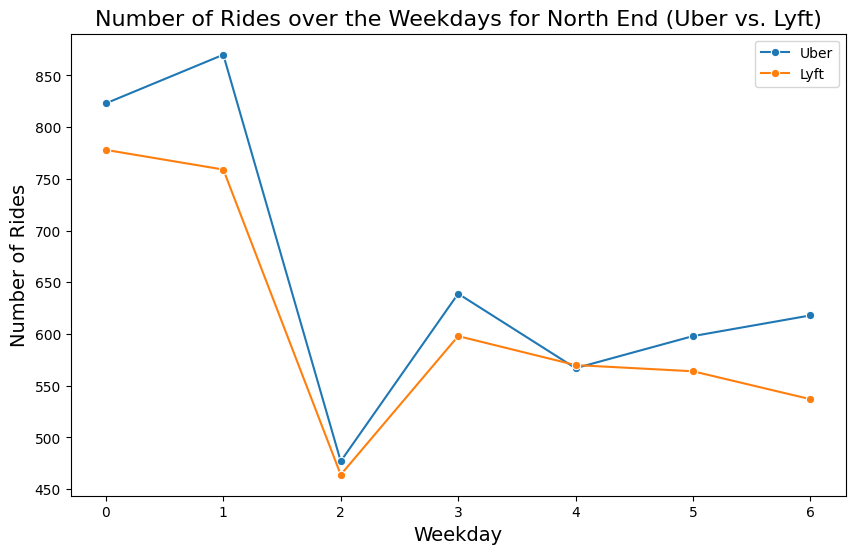

In [ ]:
source_uber = uber[rides['source'] == 'North End']
source_lyft = lyft[rides['source'] == 'North End']

no_of_rides_weekdays(source_uber, source_lyft, 'North End')

<ipython-input-192-fbffffa44777>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'North Station']
<ipython-input-192-fbffffa44777>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'North Station']


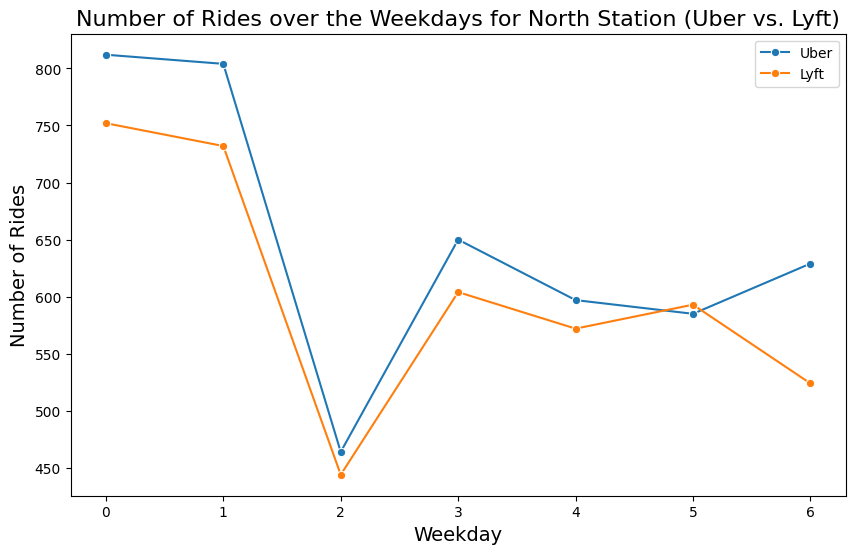

In [ ]:
source_uber = uber[rides['source'] == 'North Station']
source_lyft = lyft[rides['source'] == 'North Station']

no_of_rides_weekdays(source_uber, source_lyft, 'North Station')

<ipython-input-193-f98ac525393d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Northeastern University']
<ipython-input-193-f98ac525393d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Northeastern University']


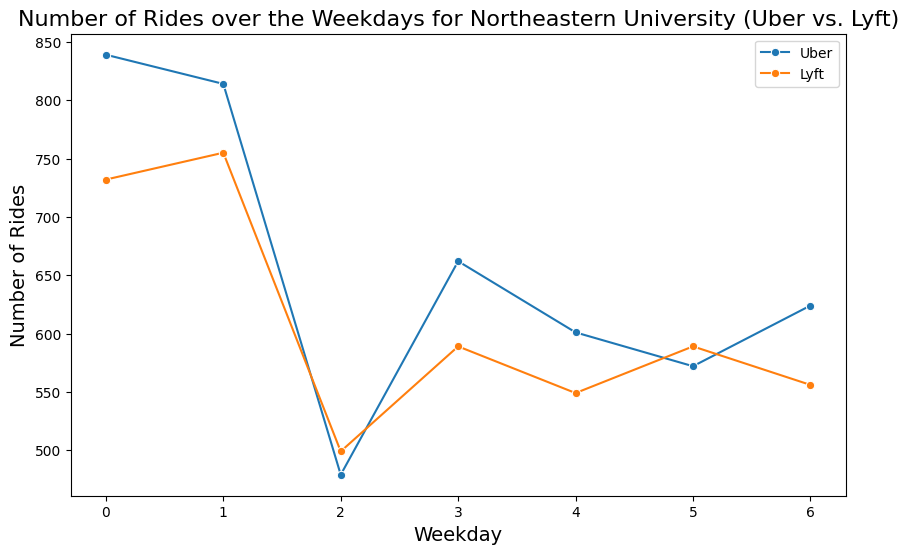

In [ ]:
source_uber = uber[rides['source'] == 'Northeastern University']
source_lyft = lyft[rides['source'] == 'Northeastern University']

no_of_rides_weekdays(source_uber, source_lyft, 'Northeastern University')

<ipython-input-194-9c842378a199>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'South Station']
<ipython-input-194-9c842378a199>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'South Station']


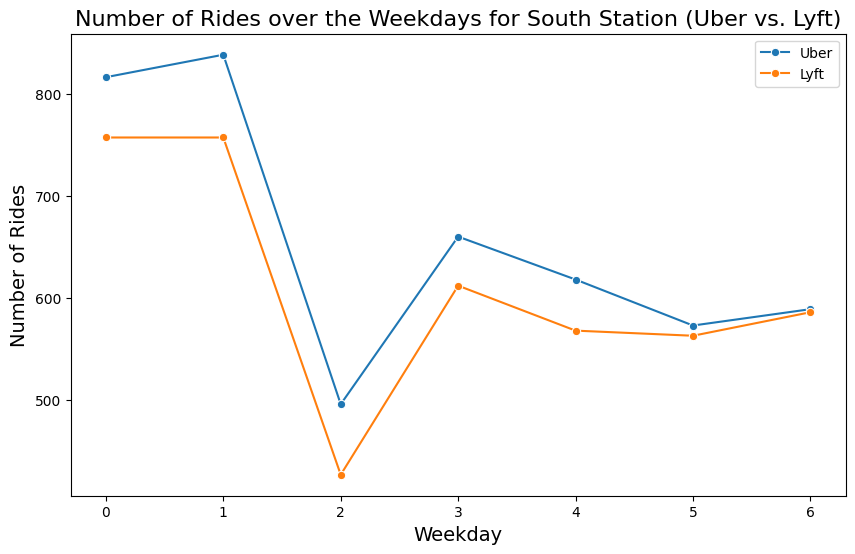

In [ ]:
source_uber = uber[rides['source'] == 'South Station']
source_lyft = lyft[rides['source'] == 'South Station']

no_of_rides_weekdays(source_uber, source_lyft, 'South Station')

<ipython-input-195-c15092f39c2b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'Theatre District']
<ipython-input-195-c15092f39c2b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'Theatre District']


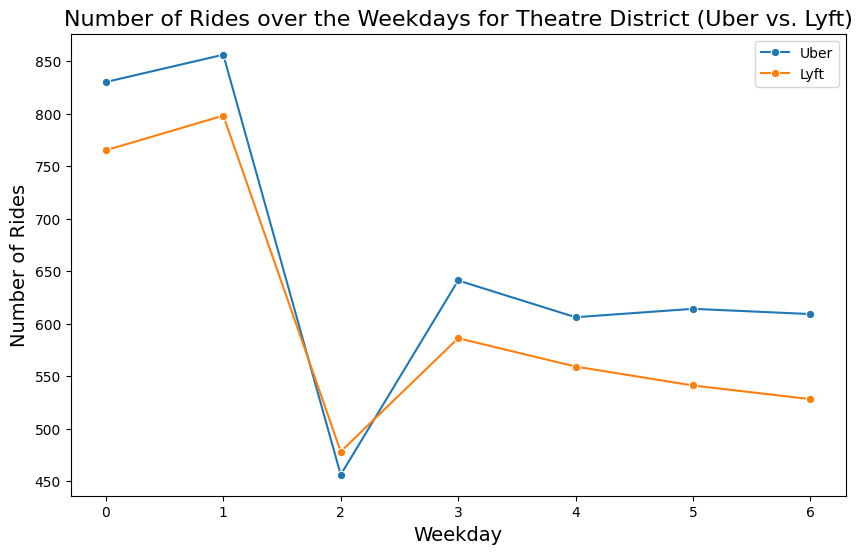

In [ ]:
source_uber = uber[rides['source'] == 'Theatre District']
source_lyft = lyft[rides['source'] == 'Theatre District']

no_of_rides_weekdays(source_uber, source_lyft, 'Theatre District')

<ipython-input-196-dc1779173aa1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_uber = uber[rides['source'] == 'West End']
<ipython-input-196-dc1779173aa1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  source_lyft = lyft[rides['source'] == 'West End']


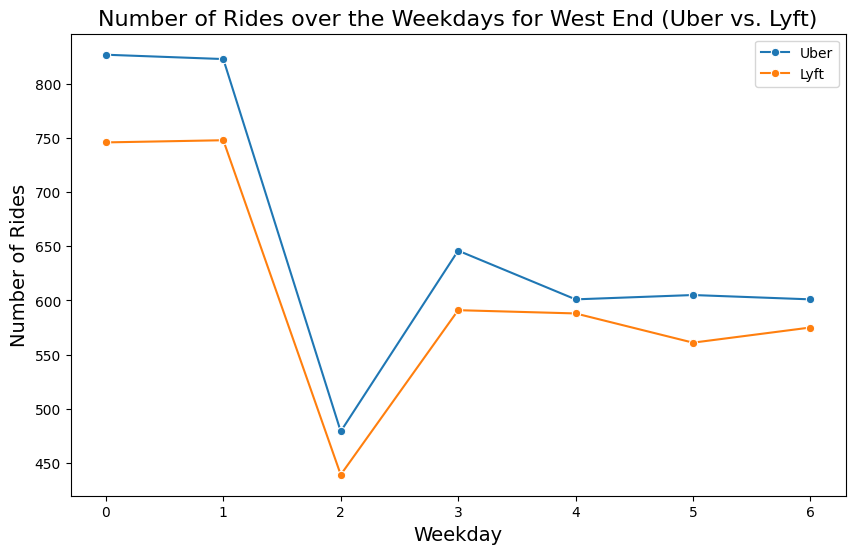

In [ ]:
source_uber = uber[rides['source'] == 'West End']
source_lyft = lyft[rides['source'] == 'West End']

no_of_rides_weekdays(source_uber, source_lyft, 'West End')

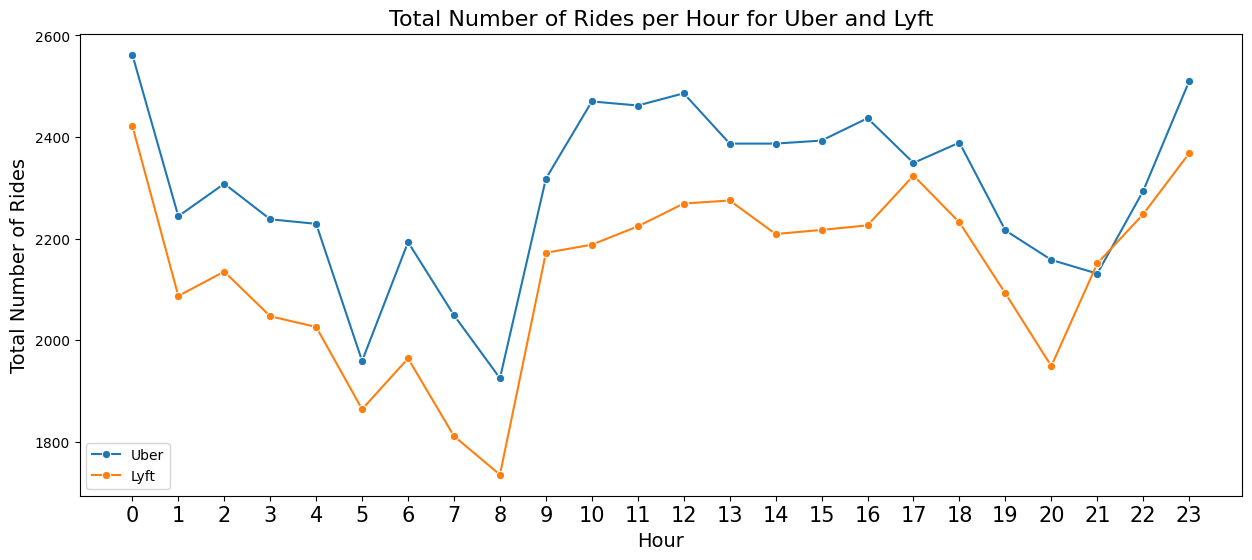

In [ ]:
rides_per_hour_uber = uber['time'].value_counts().sort_index()
rides_per_hour_lyft = lyft['time'].value_counts().sort_index()

# Set up the plot
plt.figure(figsize=(15, 6))

# Plot the total number of rides per hour for Uber
sns.lineplot(x=rides_per_hour_uber.index, y=rides_per_hour_uber.values, marker='o', label='Uber')

# Plot the total number of rides per hour for Lyft
sns.lineplot(x=rides_per_hour_lyft.index, y=rides_per_hour_lyft.values, marker='o', label='Lyft')

# Set labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Number of Rides', fontsize=14)
plt.title('Total Number of Rides per Hour for Uber and Lyft', fontsize=16)
plt.xticks(np.arange(0,24,1),fontsize=15)

# Show the legend
plt.legend()

# Show the plot
plt.show()

weather

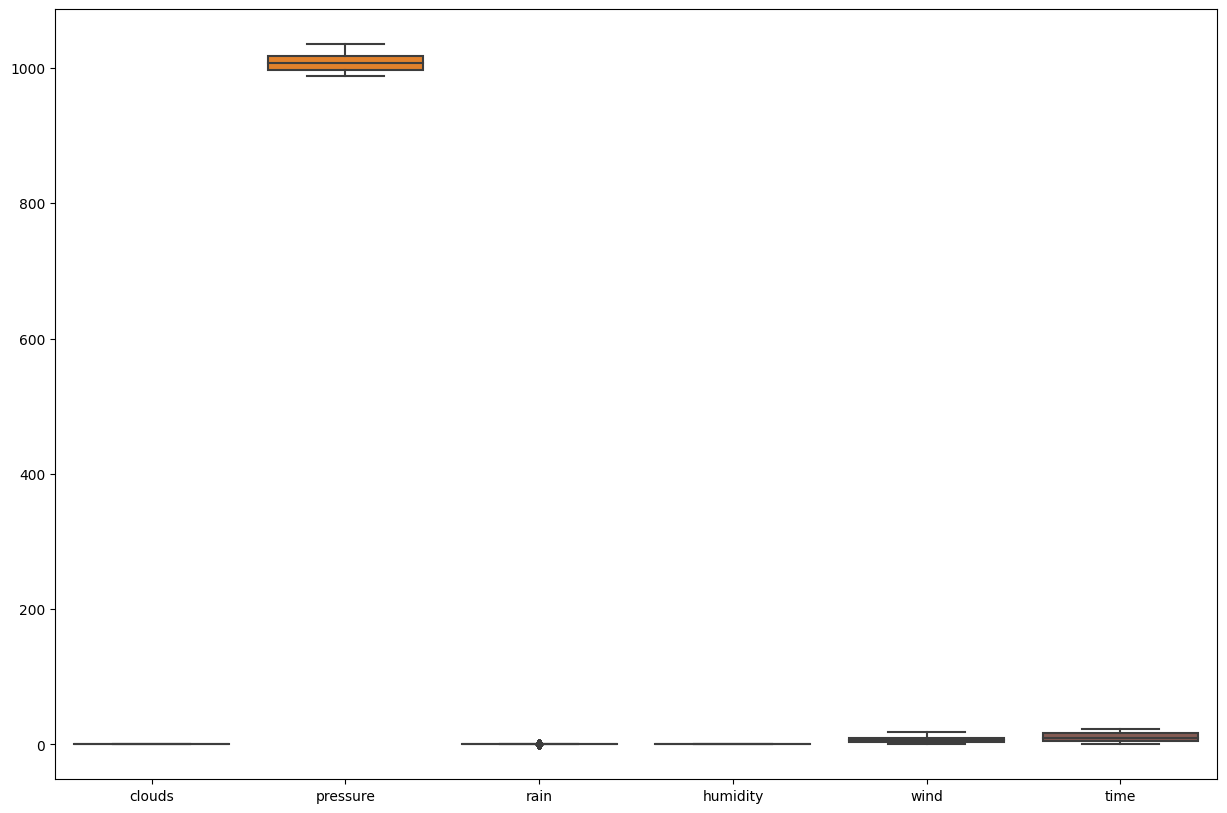

In [ ]:
columns = ["temp", "clouds", "pressure", "rain", "humidity", "wind", "time"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=weather_data[columns])
plt.show()

In [ ]:
weather_data.set_index(weather_data['time_stamp'],drop=False)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date,time
time_stamp,,,,,,,,,,
2018-12-16 23:45:01,42.42,Back Bay,1.00,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25,2018-12-16,23
2018-12-16 23:45:01,42.43,Beacon Hill,1.00,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32,2018-12-16,23
2018-12-16 23:45:01,42.50,Boston University,1.00,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07,2018-12-16,23
2018-12-16 23:45:01,42.11,Fenway,1.00,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09,2018-12-16,23
2018-12-16 23:45:01,43.13,Financial District,1.00,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49,2018-12-16,23
...,...,...,...,...,...,...,...,...,...,...
2018-12-03 06:52:54,44.72,North Station,0.89,1000.69,NaN,2018-12-03 06:52:54,0.96,1.52,2018-12-03,6
2018-12-03 06:52:54,44.85,Northeastern University,0.88,1000.71,NaN,2018-12-03 06:52:54,0.96,1.54,2018-12-03,6
2018-12-03 06:52:54,44.82,South Station,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54,2018-12-03,6


<ipython-input-205-51522f66a410>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


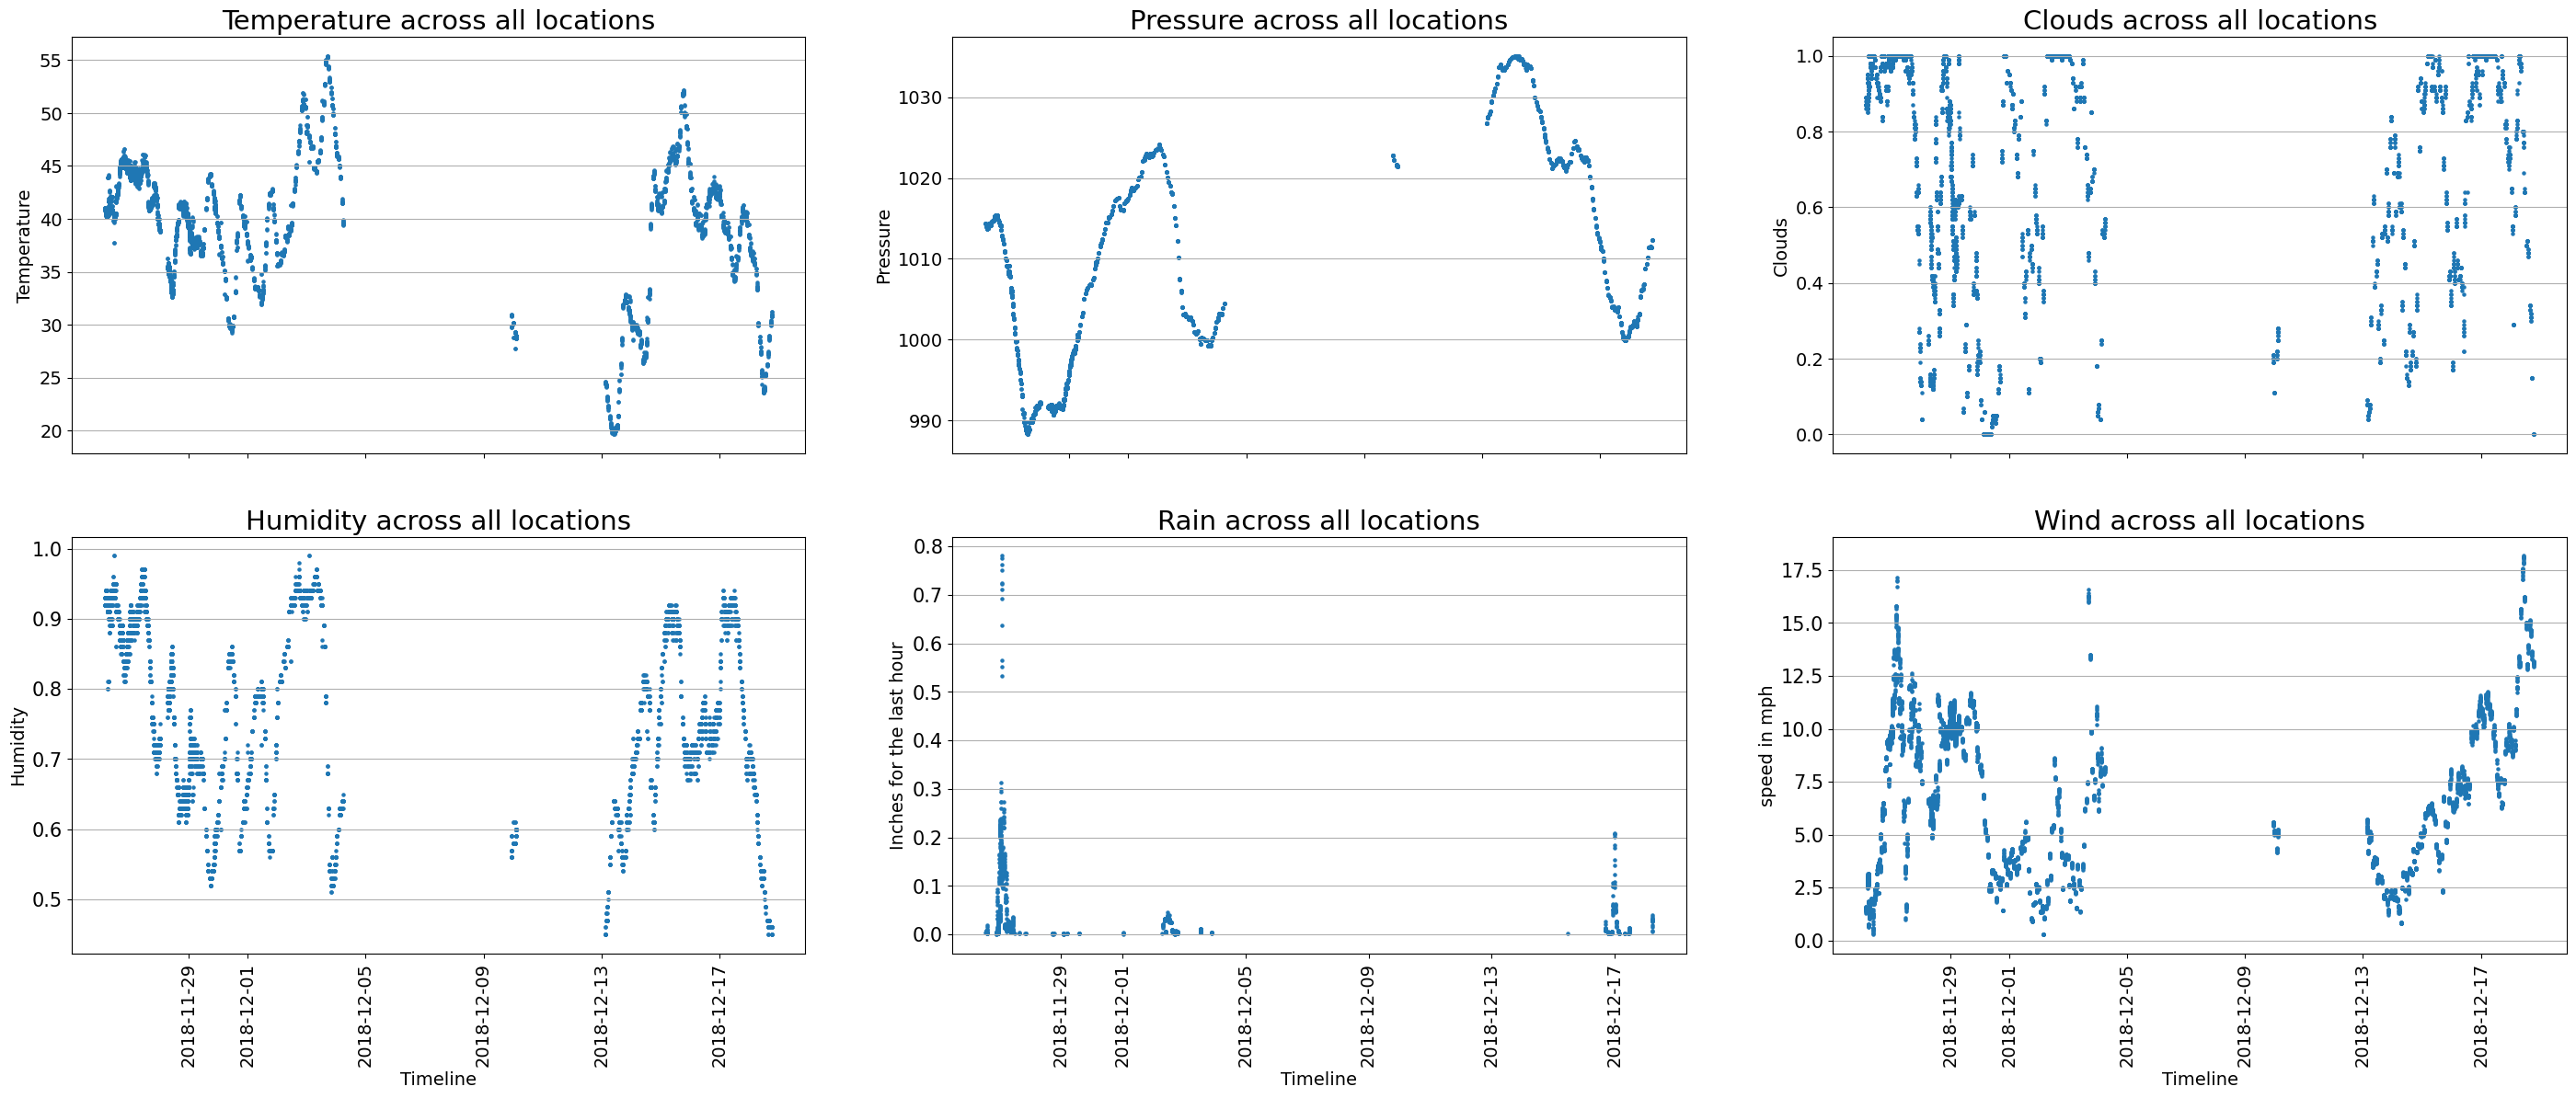

In [ ]:
plt.figure(figsize=((35,20)))
plt.grid(axis='y')

plt.subplot(3,3,1)
plt.scatter(weather_data['time_stamp'],weather_data['temp'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Temperature',fontsize=14)
plt.title('Temperature across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,2)
plt.scatter(weather_data['time_stamp'],weather_data['pressure'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Pressure',fontsize=14)
plt.title('Pressure across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,3)
plt.scatter(weather_data['time_stamp'],weather_data['clouds'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Clouds',fontsize=14)
plt.title('Clouds across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,4)
plt.scatter(weather_data['time_stamp'],weather_data['humidity'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title('Humidity across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,5)
plt.scatter(weather_data['time_stamp'],weather_data['rain'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('Inches for the last hour',fontsize=14)
plt.title('Rain across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,6)
plt.scatter(weather_data['time_stamp'],weather_data['wind'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('speed in mph',fontsize=14)
plt.title('Wind across all locations',fontsize=21)
plt.grid(axis='y')

plt.show()

<ipython-input-221-d9bb6ad04d99>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,1,1)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.9% of the points cannot be 

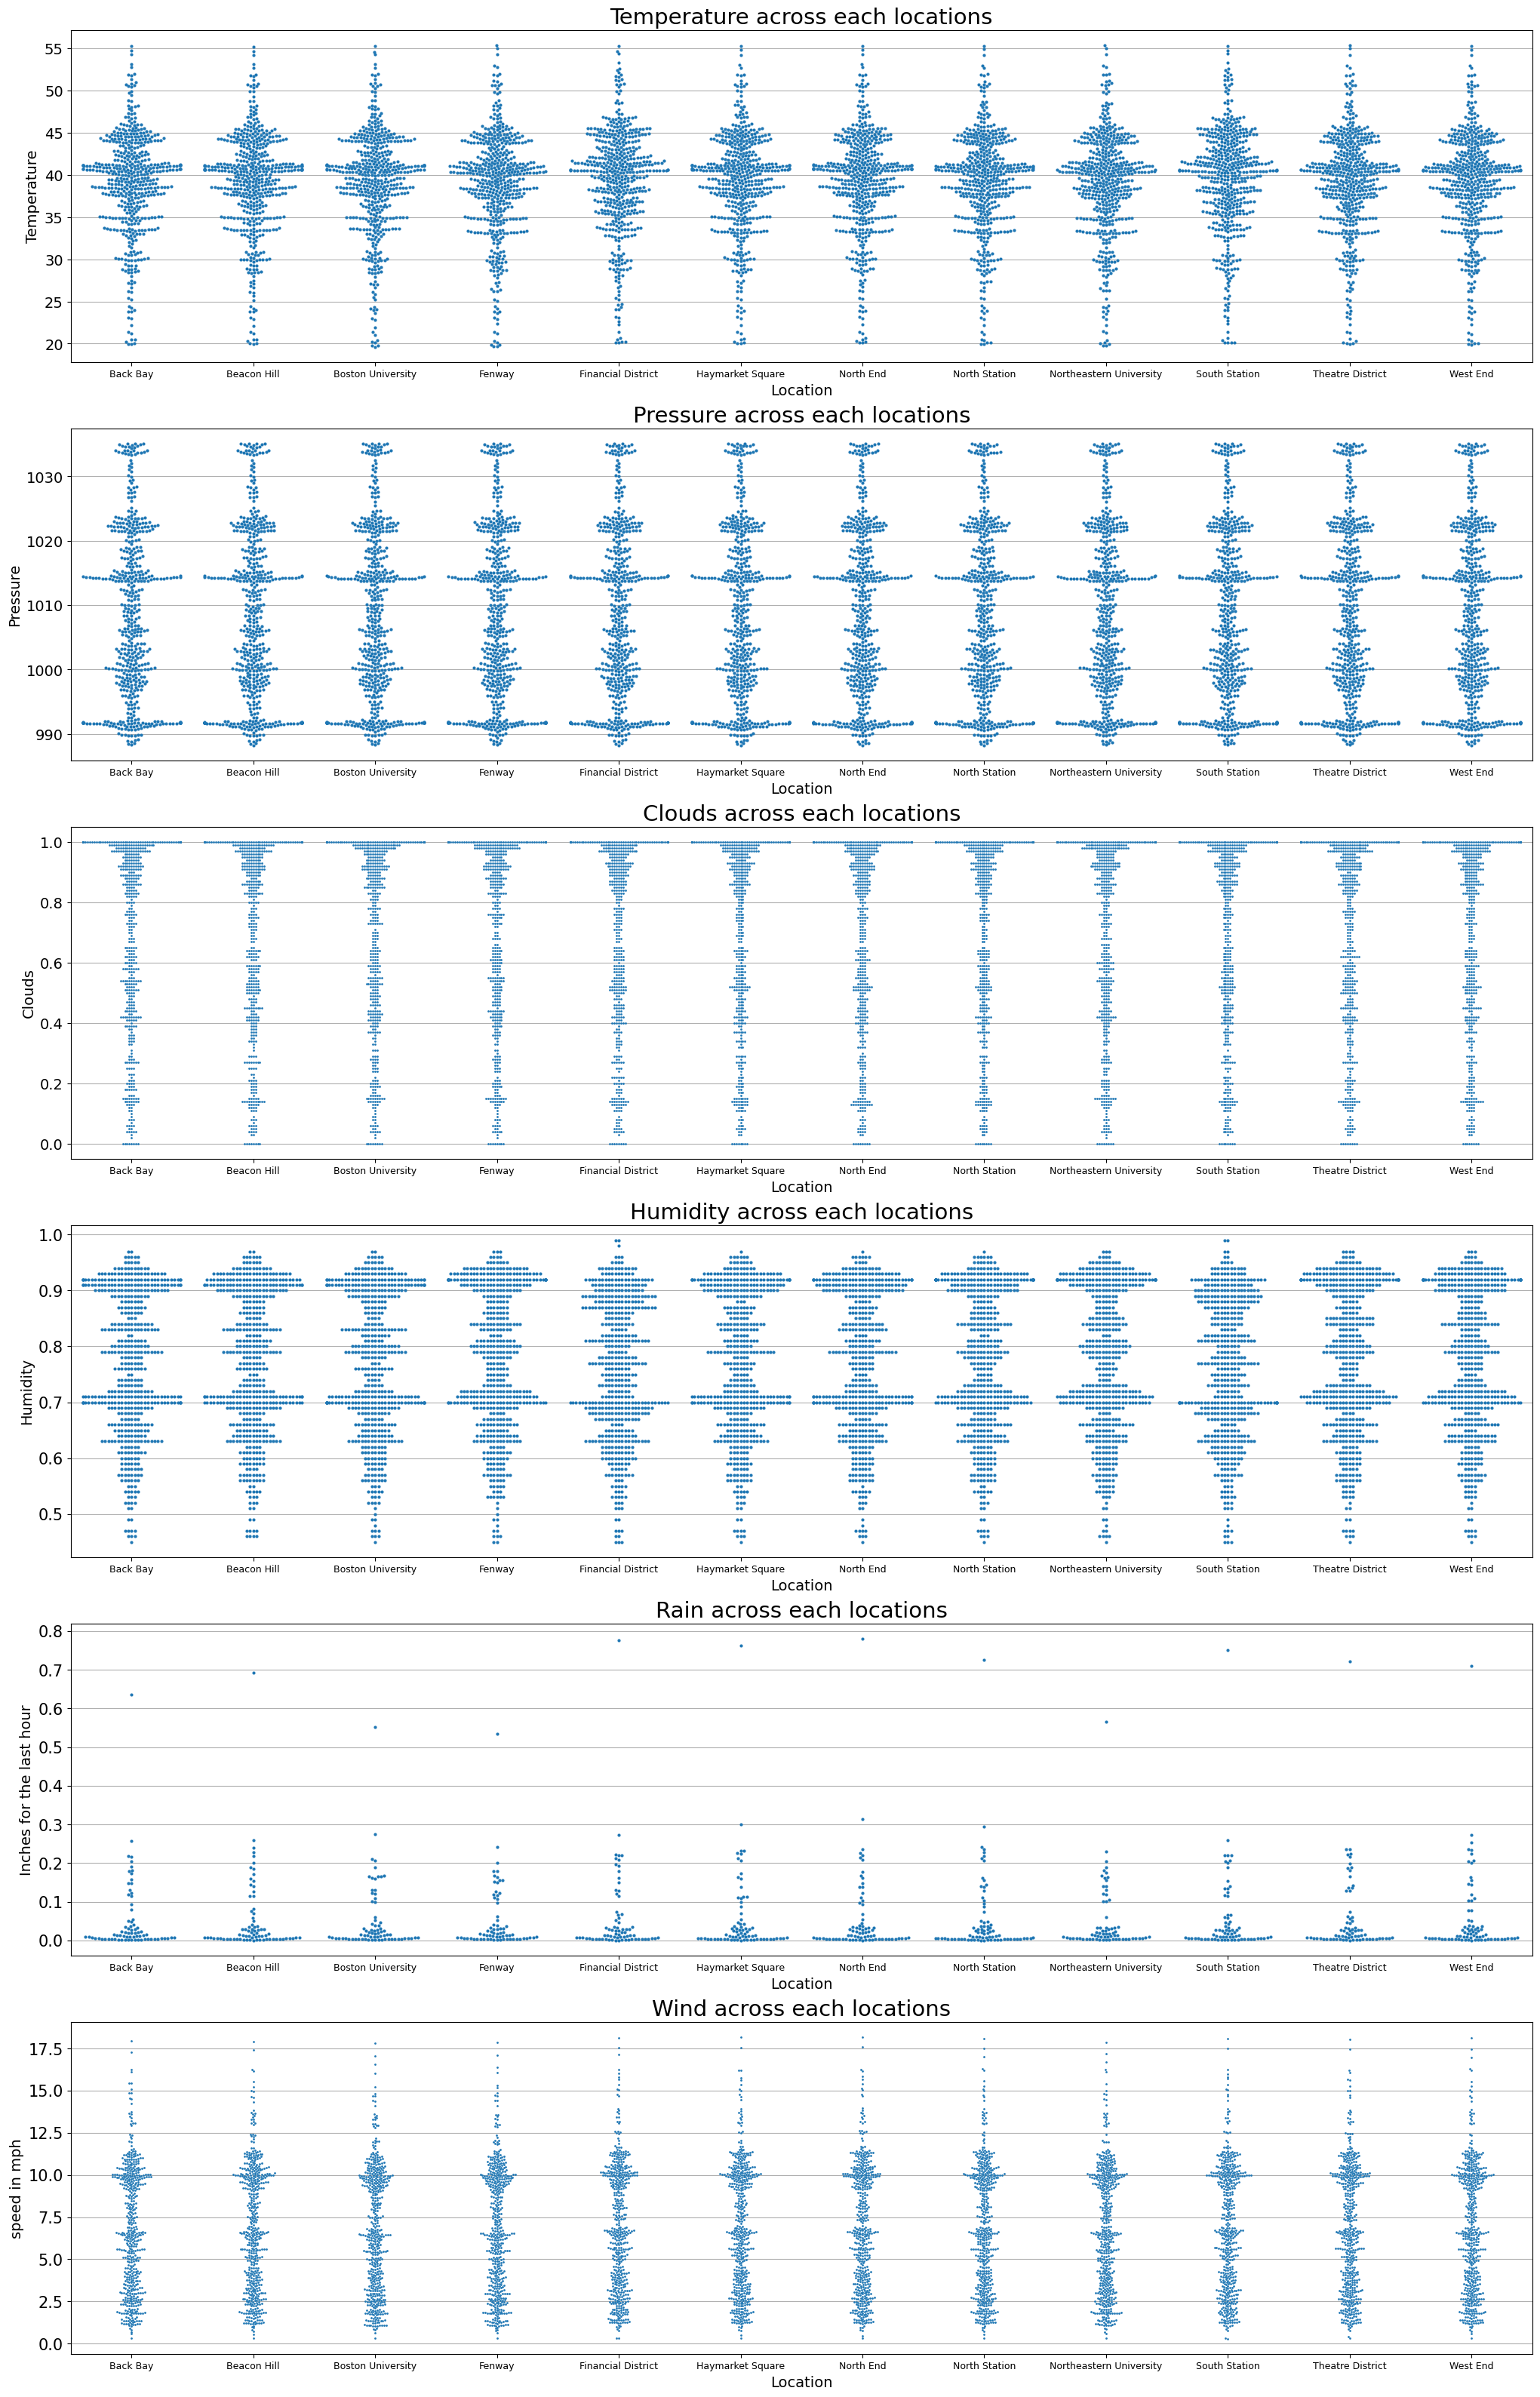

In [ ]:
plt.figure(figsize=((25,40)))
plt.grid(axis='y')

plt.subplot(6,1,1)
sns.swarmplot(x='location',y='temp',data=weather_data,size=3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.title('Temperature across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,2)
sns.swarmplot(x='location',y='pressure',data=weather_data,size=3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Pressure',fontsize=14)
plt.title('Pressure across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,3)
sns.swarmplot(x='location',y='clouds',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Clouds',fontsize=14)
plt.title('Clouds across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,4)
sns.swarmplot(x='location',y='humidity',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title('Humidity across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,5)
sns.swarmplot(x='location',y='rain',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Inches for the last hour',fontsize=14)
plt.title('Rain across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,6)
sns.swarmplot(x='location',y='wind',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('speed in mph',fontsize=14)
plt.title('Wind across each locations',fontsize=21)
plt.grid(axis='y')

plt.show()